<a href="https://colab.research.google.com/github/nhinguyen-lab/dataproject/blob/main/EDA_LearnPlatform_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Library Import

1. Import library

2. Engagement files

- merge all cvs file to 1 dataframe : engagement_data table
- change datatype : time -> datetime / distric id & lp id -> int64
- add columns for month and day of the week breakdown

3. Product file

- split the primary function into 2 columns

4. District file

- split the interval for pct_black/hispanic, pct_free/reduced and pct_pp_raw

5. Merging files

- Product & Engagament
- District & Engagement

In [ ]:
#1. lib import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dist_info = pd.read_csv('/content/drive/MyDrive/Final project - LearnPlatform/districts_info.csv')
prod_info= pd.read_csv('/content/drive/MyDrive/Final project - LearnPlatform/products_info.csv')
engagement_info = pd.read_csv('/content/drive/MyDrive/Final project - LearnPlatform/engagement_data/1000.csv')

# Engagement dataframe

In [ ]:
#2.merge all csv - enagement files
import glob
import os
path = r'/content/drive/MyDrive/Final project - LearnPlatform/engagement_data'

all_files =glob.glob(os.path.join(path, "*.csv"))

li = []

for filename in all_files:
  df_1 = pd.read_csv(filename, index_col = None, header = 0)
  li.append(df_1)

engagement_data = pd.concat(li, axis=0, ignore_index=True)

engagement_data.head()

time    lp_id  pct_access  engagement_index
0  2020-01-01  93690.0        0.00               NaN
1  2020-01-01  17941.0        0.03              0.90
2  2020-01-01  65358.0        0.03              1.20
3  2020-01-01  98265.0        0.57             37.79
4  2020-01-01  59257.0        0.00               NaN

In [ ]:
#2a. add new col filename
dfs = list()
for filename in all_files:
    data = pd.read_csv(filename)
    data['filename'] = filename.split('/content/drive/MyDrive/Final project - LearnPlatform/engagement_data/')[1].split('.csv')[0]
    dfs.append(data)

engagement_data = pd.concat(dfs, ignore_index=True)


In [ ]:
#2b. rename col filename to dist id
engagement_data = engagement_data.rename(columns = {'filename':'dist_id'})

#3. fillna for engagement table
engagement_data = engagement_data.fillna(0)

#4. change datatype - to join tables

engagement_data['time'] = pd.to_datetime(engagement_data['time'])
engagement_data['dist_id'] = engagement_data['dist_id'].astype('int64')
engagement_data['lp_id']= engagement_data['lp_id'].astype('int64')

In [ ]:
#5. add columns month
engagement_data['month'] = engagement_data['time'].dt.month
engagement_data.head()

time  lp_id  pct_access  engagement_index  dist_id  month
0 2020-01-01  93690        0.00              0.00     1000      1
1 2020-01-01  17941        0.03              0.90     1000      1
2 2020-01-01  65358        0.03              1.20     1000      1
3 2020-01-01  98265        0.57             37.79     1000      1
4 2020-01-01  59257        0.00              0.00     1000      1

##Create table for Tableau

- Drop 0.00 value for engagement index and access
- Group by data time, lp and district id , agg engagement and access : mean

In [ ]:
#1. drop 0.0 values
engagement_data_temp = engagement_data[(engagement_data['pct_access'] != 0.00) & (engagement_data['engagement_index'] != 0.00)]

In [ ]:
#2. temp table for engagement/pct access mean + groupby time,lp & district
engagement_to_tableau = engagement_data_temp.groupby(['time','lp_id','dist_id']).aggregate({'engagement_index':'mean', 'pct_access': 'mean'})
engagement_to_tableau.reset_index().head()

time  lp_id  dist_id  engagement_index  pct_access
0 2020-01-01  10084     1044              0.52        0.02
1 2020-01-01  10084     1450              0.21        0.02
2 2020-01-01  10084     1965              0.62        0.06
3 2020-01-01  10084     2598              0.10        0.01
4 2020-01-01  10084     3393              4.89        0.04

In [ ]:
#download file csv
from google.colab import files
engagement_to_tableau.to_csv('engagement_access_av.csv')
files.download('engagement_access_av.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Product dataframe

In [ ]:
#1. Split primary function
prod_info[['Function', 'Function detail']] = prod_info['Primary Essential Function'].str.split('-', n =1 , expand = True)
prod_info.head()

LP ID                           URL  Product Name  Provider/Company Name  \
0  13117    https://www.splashmath.com   SplashLearn          StudyPad Inc.   
1  66933          https://abcmouse.com  ABCmouse.com  Age of Learning, Inc    
2  50479         https://www.abcya.com        ABCya!         ABCya.com, LLC   
3  92993         http://www.aleks.com/         ALEKS    McGraw-Hill PreK-12   
4  73104  https://www.achieve3000.com/   Achieve3000            Achieve3000   

            Sector(s)                         Primary Essential Function  \
0             PreK-12                    LC - Digital Learning Platforms   
1             PreK-12                    LC - Digital Learning Platforms   
2             PreK-12  LC - Sites, Resources & Reference - Games & Si...   
3  PreK-12; Higher Ed                    LC - Digital Learning Platforms   
4             PreK-12                    LC - Digital Learning Platforms   

  Function                                    Function detail  
0      LC                          Digital Learning Platforms  
1      LC                          Digital Learning Platforms  
2      LC    Sites, Resources & Reference - Games & Simula...  
3      LC                          Digital Learning Platforms  
4      LC                          Digital Learning Platforms

In [ ]:
#2. rename the lp id to join table with engagement
prod_info=prod_info.rename(columns = {'LP ID':'lp_id'})
prod_engage_summary = engagement_data.join(prod_info.set_index('lp_id'), on = ['lp_id'])
prod_engage_summary.head()

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

                                  URL    Product Name Provider/Company Name  \
0           http://www.calculator.com  Calculator.com        Calculator.com   
1  https://www.kidsa-z.com/main/Login        Kids A-Z            Lazel Inc.   
2                http://www.prezi.com           Prezi            Prezi Inc.   
3                 http://quizlet.com/         Quizlet               Quizlet   
4                http://www.issuu.com           Issuu                 Issuu   

                       Sector(s)         Primary Essential Function Function  \
0  PreK-12; Higher Ed; Corporate  LC - Sites, Resources & Reference      LC    
1                        PreK-12    LC - Digital Learning Platforms      LC    
2  PreK-12; Higher Ed; Corporate   LC - Content Creation & Curation      LC    
3                        PreK-12                   LC - Study Tools      LC    
4  PreK-12; Higher Ed; Corporate   LC - Content Creation & Curation      LC    

                 Function detail  
0   Sites, Resources & Reference  
1     Digital Learning Platforms  
2    Content Creation & Curation  
3                    Study Tools  
4    Content Creation & Curation

In [ ]:
#3. overview count distinct for product
prod_engage_summary['Product Name'].nunique()

369

In [ ]:
#4. overview count distinct for provider
prod_engage_summary['Provider/Company Name'].nunique()

289

## Create product table for Tableau

In [ ]:
product_to_tableau = prod_engage_summary[['time','lp_id','Product Name','Provider/Company Name','Function','Function detail','engagement_index','pct_access','dist_id']].dropna()

NameError: ignored

In [ ]:
product_to_tableau=product_to_tableau[(product_to_tableau['engagement_index'] != 0.0) & (product_to_tableau['engagement_index'] != 0.0)].groupby(['time','Function','lp_id','Product Name']).mean().reset_index()

<ipython-input-50-54f1b8d94d68>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_to_tableau=product_to_tableau[(product_to_tableau['engagement_index'] != 0.0) & (product_to_tableau['engagement_index'] != 0.0)].groupby(['time','Function','lp_id','Product Name']).mean().reset_index()


In [ ]:
#download file csv
from google.colab import files
product_to_tableau.to_csv('product_av.csv')
files.download('product_av.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# District dataframe

In [ ]:
#1. rename district id + join engagement & district table
dist_info=dist_info.rename(columns = {'district_id':'dist_id'})
dist_engagement_summary = engagement_data.join(dist_info.set_index('dist_id'), on = ['dist_id'])
dist_engagement_summary.head()

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

         state  locale pct_black/hispanic pct_free/reduced  \
0  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
1  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
2  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
3  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
4  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   

  county_connections_ratio pp_total_raw  
0                [0.18, 1[          NaN  
1                [0.18, 1[          NaN  
2                [0.18, 1[          NaN  
3                [0.18, 1[          NaN  
4                [0.18, 1[          NaN

In [ ]:
#2. change pct_black/hispanic	/ pct_free/reduced	/ pp_total_raw to float and take the first number in the interval
pct_black_hispanic = []

for value in dist_engagement_summary['pct_black/hispanic']:
  val = 0
  if isinstance(value, float):
    val = None
  else:
    k = value.split(", ")
    val = k[0][1:]
  pct_black_hispanic.append(val)

dist_engagement_summary['pct_black_hispanic'] = pct_black_hispanic

pct_free_reduced = []

for value in dist_engagement_summary['pct_free/reduced']:
  val = 0
  if isinstance(value, float):
    val = None
  else:
    k = value.split(", ")
    val = k[0][1:]
  pct_free_reduced.append(val)

dist_engagement_summary['pct_free_reduced'] = pct_free_reduced

pp_total = []

for value in dist_engagement_summary['pp_total_raw']:
  val = 0
  if isinstance(value, float):
    val = None
  else:
    k = value.split(", ")
    val = k[0][1:]
  pp_total.append(val)

dist_engagement_summary['pp_total'] = pp_total

dist_engagement_summary.head()


time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

         state  locale pct_black/hispanic pct_free/reduced  \
0  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
1  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
2  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
3  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
4  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   

  county_connections_ratio pp_total_raw pct_black_hispanic pct_free_reduced  \
0                [0.18, 1[          NaN                0.6              0.2   
1                [0.18, 1[          NaN                0.6              0.2   
2                [0.18, 1[          NaN                0.6              0.2   
3                [0.18, 1[          NaN                0.6              0.2   
4                [0.18, 1[          NaN                0.6              0.2   

  pp_total  
0     None  
1     None  
2     None  
3     None  
4     None

In [ ]:
#3. change datatype to float64
dist_engagement_summary['pct_black_hispanic']= dist_engagement_summary['pct_black_hispanic'].astype('float64')
dist_engagement_summary['pct_free_reduced']= dist_engagement_summary['pct_free_reduced'].astype('float64')
dist_engagement_summary['pp_total']= dist_engagement_summary['pp_total'].astype('float64')

#4. working dataframe- engagement temp table with key series - access,engagement, black/hispanic, free/reduced, total
dist_engage_temp = dist_engagement_summary.drop(columns = ['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw'])
dist_engage_temp.head()

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

         state  locale  pct_black_hispanic  pct_free_reduced  pp_total  
0  Connecticut  Suburb                 0.6               0.2       NaN  
1  Connecticut  Suburb                 0.6               0.2       NaN  
2  Connecticut  Suburb                 0.6               0.2       NaN  
3  Connecticut  Suburb                 0.6               0.2       NaN  
4  Connecticut  Suburb                 0.6               0.2       NaN

## Clean up table for Tableau :

- group data accordingly to time, lp and district id , agg mean : hispanic/black and free/reduce , sum : pp_total

- drop Nan & 0.0 values

- categorize above and below median , media is 0.4 for hispanic/black and free/reduce group of students

In [ ]:
#Create temporary table
dist_temp = dist_engage_temp.groupby(['time','lp_id','dist_id','locale']).aggregate({'engagement_index':'mean','pct_access':'mean','pct_black_hispanic':'mean', 'pct_free_reduced': 'mean','pp_total':'sum'})
dist_temp.head()


engagement_index  pct_access  \
time       lp_id dist_id locale                                 
2020-01-01 10084 1044    Suburb              0.52        0.02   
                 1450    Suburb              0.21        0.02   
                 1965    Suburb              0.62        0.06   
                 2598    Suburb              0.10        0.01   
                 4668    Suburb              0.02        0.00   

                                 pct_black_hispanic  pct_free_reduced  \
time       lp_id dist_id locale                                         
2020-01-01 10084 1044    Suburb                 0.0               0.0   
                 1450    Suburb                 0.0               0.0   
                 1965    Suburb                 0.0               NaN   
                 2598    Suburb                 0.0               0.0   
                 4668    Suburb                 0.0               0.2   

                                 pp_total  
time       lp_id dist_id locale            
2020-01-01 10084 1044    Suburb   10000.0  
                 1450    Suburb       0.0  
                 1965    Suburb   22000.0  
                 2598    Suburb       0.0  
                 4668    Suburb    6000.0

In [ ]:
#dropna
dist_temp=dist_temp.reset_index().dropna()
#remove 0 values
dist_temp = dist_temp[(dist_temp['pct_black_hispanic'] != 0.0)
& (dist_temp['pct_free_reduced'] != 0.0)
&(dist_temp['pct_free_reduced'] != None)
& (dist_temp['pp_total'] != 0.0)
& (dist_temp['engagement_index'] != 0.0)
& (dist_temp['pct_access'] != 0.0)
]

In [ ]:
#add in situation black/hispanic category- pịck 0.4 as median
dist_temp['black/hispanic_situation'] = ['low black/hispanic' if v  < 0.4 else 'high black/hispanic' for v in dist_temp['pct_black_hispanic']]
dist_temp['free/reduce_situation'] = ['below poverty' if v  < 0.4 else 'above poverty' for v in dist_temp['pct_free_reduced']]

dist_temp.head()

time  lp_id  dist_id  locale  engagement_index  pct_access  \
15  2020-01-01  10178     4683  Suburb              0.13        0.01   
51  2020-01-01  10533     3222    City              0.68        0.01   
72  2020-01-01  10533     5510    City              0.51        0.01   
96  2020-01-01  10533     8784  Suburb              2.00        0.05   
108 2020-01-01  10625     1705    City              0.15        0.02   

     pct_black_hispanic  pct_free_reduced  pp_total black/hispanic_situation  \
15                  0.4               0.4    8000.0      high black/hispanic   
51                  0.2               0.6    8000.0       low black/hispanic   
72                  0.2               0.4   14000.0       low black/hispanic   
96                  0.6               0.6   10000.0      high black/hispanic   
108                 0.2               0.4   12000.0       low black/hispanic   

    free/reduce_situation  
15          above poverty  
51          above poverty  
72          above poverty  
96          above poverty  
108         above poverty

In [ ]:
from google.colab import files
dist_temp.to_csv('district_av.csv')
files.download('district_av.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

clean and processed dataframe to use :

- engagement_data
- prod_engage_summary
- dist_engage_temp : clean pct_black_hispanic & pct_ free_reduced & pp_total
- dist_temp : add in above and below median ( 0.4 ) for pct_black_hispanic & pct_free_reduced situation

# 2020 - Engagement index & Access pct During Week

In [ ]:
engagement_data.head()

time  lp_id  pct_access  engagement_index  dist_id  month
0 2020-01-01  93690        0.00              0.00     1000      1
1 2020-01-01  17941        0.03              0.90     1000      1
2 2020-01-01  65358        0.03              1.20     1000      1
3 2020-01-01  98265        0.57             37.79     1000      1
4 2020-01-01  59257        0.00              0.00     1000      1

In [ ]:
#1. add dateweek columns to engagement data
engagement_data['date_week']=engagement_data['time'].dt.weekday
engagement_data.head()
# Monday=0, Sunday=6

time  lp_id  pct_access  engagement_index  dist_id  month  date_week
0 2020-01-01  93690        0.00              0.00     1000      1          2
1 2020-01-01  17941        0.03              0.90     1000      1          2
2 2020-01-01  65358        0.03              1.20     1000      1          2
3 2020-01-01  98265        0.57             37.79     1000      1          2
4 2020-01-01  59257        0.00              0.00     1000      1          2

In [ ]:
#2. create temp table for date_week
connect_date_week = engagement_data.groupby(['date_week']).agg({'pct_access':np.mean,'engagement_index':np.mean}).reset_index()
connect_date_week

date_week  pct_access  engagement_index
0          0    0.556017        141.592710
1          1    0.592752        149.536488
2          2    0.586134        146.877322
3          3    0.591126        149.182957
4          4    0.567578        142.332224
5          5    0.176269         45.077777
6          6    0.161620         42.033288

Caculation for drop down percentage

In [ ]:
#1. week - date mean
week_day_av = connect_date_week[connect_date_week['date_week'] <5]['engagement_index'].mean()

In [ ]:
#2. weekend mean
weekend_av = connect_date_week[connect_date_week['date_week'] >= 5]['engagement_index'].mean()

In [ ]:
#3. drop percentage
drop_per = (weekend_av  - week_day_av) / (weekend_av) * 100
drop_per

-234.9846342634815

In [ ]:
#4. week date - access mean
week_day_pct = connect_date_week[connect_date_week['date_week'] <5]['pct_access'].mean()

In [ ]:
#5. weekend - access mean
weekend_pct = connect_date_week[connect_date_week['date_week'] >= 5]['pct_access'].mean()

In [ ]:
#6. drop percentage - access
pct_drop_per = (weekend_pct  - week_day_pct) / (weekend_pct) * 100
pct_drop_per

-242.55171841482417

Plotting the percentage drop for engagement index and pct access

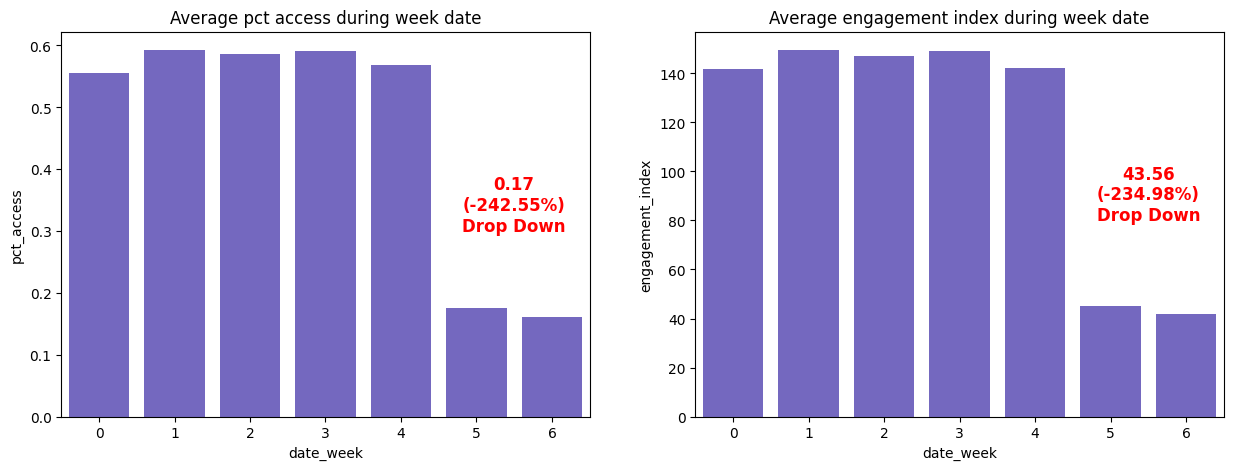

In [ ]:
#Plot for percentage drop
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.barplot( data = connect_date_week  , x = 'date_week', y = 'pct_access', color = 'slateblue' )
plt.text(
    x=5.5,
    y=0.3,
    s="{:.2f}\n({:.2f}%)\nDrop Down".format(weekend_pct, pct_drop_per),
    ha="center",
    fontsize="large",
    fontweight="bold",
    color="red",)
plt.title('Average pct access during week date')

plt.subplot(122)
sns.barplot( data = connect_date_week , x = 'date_week', y = 'engagement_index', color = 'slateblue' )
plt.text(
    x=5.5,
    y=80,
    s="{:.2f}\n({:.2f}%)\nDrop Down".format(weekend_av, drop_per),
    ha="center",
    fontsize="large",
    fontweight="bold",
    color="red",)
plt.title('Average engagement index during week date')
plt.show()

- Digital engagement is high in the first 4 days (Monday, Tuesday, Wednesday, Thursday), then it slightly decreases on Friday, up to a much lower value (usually the minimum) on Saturday and on Sunday -> showing that the level of attention towards digital and online product engagement is proportional to the amount of work and/or study imposed on that specific time


# 2020 - Engagement index & Access pct: Pre and After Covid outbreak

In [ ]:
engagement_data.head()

time  lp_id  pct_access  engagement_index  dist_id  month  date_week
0 2020-01-01  93690        0.00              0.00     1000      1          2
1 2020-01-01  17941        0.03              0.90     1000      1          2
2 2020-01-01  65358        0.03              1.20     1000      1          2
3 2020-01-01  98265        0.57             37.79     1000      1          2
4 2020-01-01  59257        0.00              0.00     1000      1          2

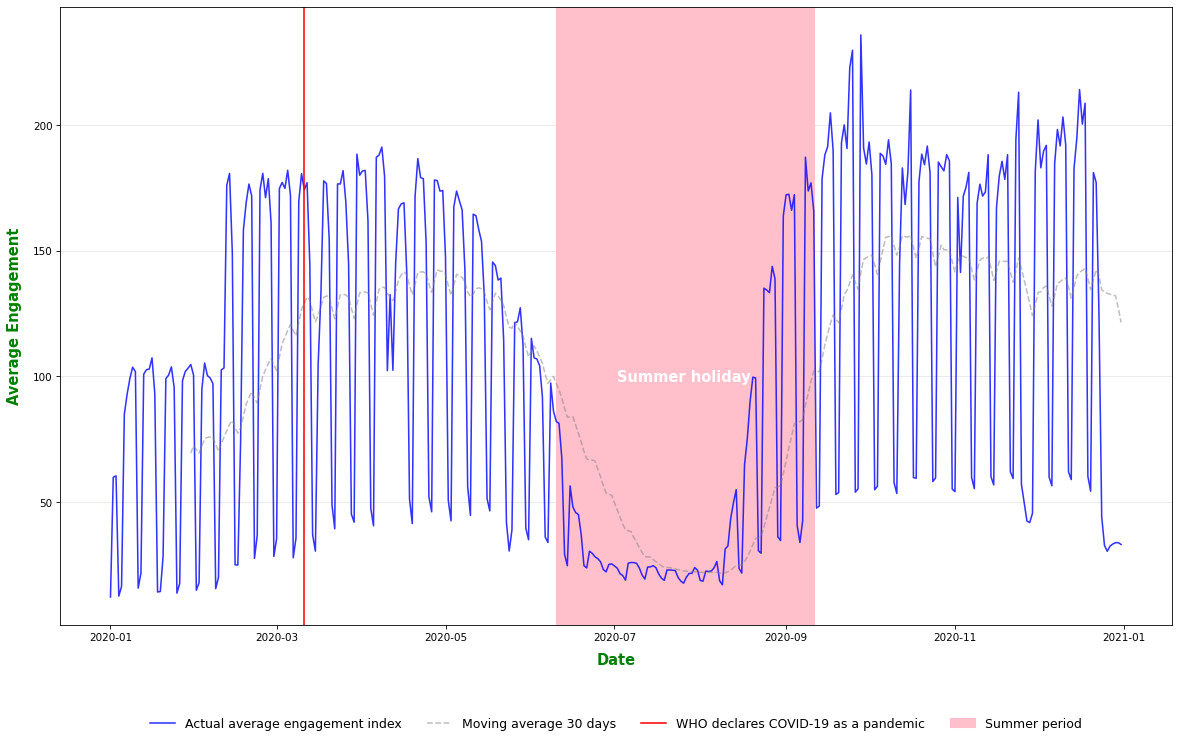

In [ ]:
#1. create temp table ENGAGEMENT INDEX - group by time + rolling window (30 days in average)
engage_temp = engagement_data.groupby('time').mean().reset_index()[['time','pct_access','engagement_index']]
rolling_20_engage = engage_temp[['engagement_index', 'pct_access']].rolling(window=30).mean()

#initiate plot
fig, ax = plt.subplots(figsize=(16, 10), dpi=75)

line_engage = ax.plot(engage_temp['time'], engage_temp['engagement_index'], color='blue', alpha=0.8, label="Actual average engagement index")
line_roll = ax.plot(engage_temp['time'], rolling_20_engage['engagement_index'], color='grey', alpha=0.5, label="Moving average 30 days", linestyle='--')
who_line = ax.axvline(x = pd.Timestamp('2020-03-11'), color='red', label="WHO declares COVID-19 as a pandemic")
ax.axvspan(pd.Timestamp('2020-06-10'), pd.Timestamp('2020-09-11'), alpha=1, color='pink', label="Summer period")


ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Date", fontsize=14, labelpad=10, fontweight='bold', color='green')
ax.set_ylabel("Average Engagement", fontsize=14, labelpad=10, fontweight='bold', color='green')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)

ax.text(
    s=f"Summer holiday",
    va='center', ha='center',
    x=pd.Timestamp('2020-07-26'), y=100,
    color='white',
    fontsize=14,
    fontweight='bold'
)


plt.tight_layout()
plt.show()

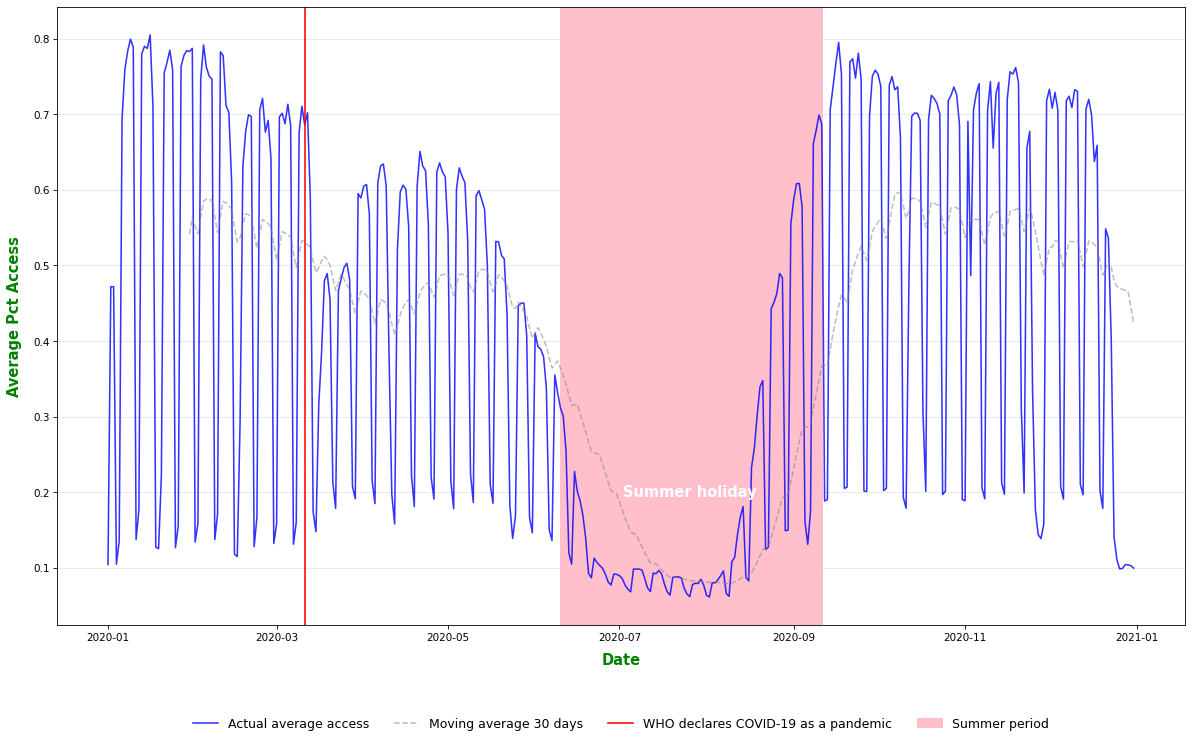

In [ ]:
#2. create temp table for PCT ACCESS
engage_temp = engagement_data.groupby('time').mean().reset_index()[['time','pct_access','engagement_index']]
rolling_20_engage = engage_temp[['engagement_index', 'pct_access']].rolling(window=30).mean()

#initiate plot
fig, ax = plt.subplots(figsize=(16, 10), dpi=75)

line_engage = ax.plot(engage_temp['time'], engage_temp['pct_access'], color='blue', alpha=0.8, label="Actual average access")
line_roll = ax.plot(engage_temp['time'], rolling_20_engage['pct_access'], color='grey', alpha=0.5, label="Moving average 30 days", linestyle='--')
who_line = ax.axvline(x = pd.Timestamp('2020-03-11'), color='red', label="WHO declares COVID-19 as a pandemic")
ax.axvspan(pd.Timestamp('2020-06-10'), pd.Timestamp('2020-09-11'), alpha=1, color='pink', label="Summer period")


ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Date", fontsize=14, labelpad=10, fontweight='bold', color='green')
ax.set_ylabel("Average Pct Access", fontsize=14, labelpad=10, fontweight='bold', color='green')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)

ax.text(
    s=f"Summer holiday",
    va='center', ha='center',
    x=pd.Timestamp('2020-07-26'), y=0.2,
    color='white',
    fontsize=14,
    fontweight='bold'
)


plt.tight_layout()
plt.show()

Calculate the drop on pct_access after WHO declared pademic

In [ ]:
engagement_data[engagement_data['time'] == '2020-03-11']['pct_access'].mean()

0.6858019179298841

In [ ]:
engagement_data[engagement_data['time'] == '2020-03-15']['pct_access'].mean()

0.14752326982041172

In [ ]:
#drop percentage
(0.6858019179298841-0.14752326982041172 / 0.6858019179298841)*100

47.06913065951774

Analyze when the Covid outbreak happened - Covid outbreak happened on the 2nd week of February with a sharp increase in digital engagement

In [ ]:
#1. add in week datapoint for engagement_data table
engagement_data['week'] = engagement_data['time'].dt.isocalendar().week
engagement_data.head()

time  lp_id  pct_access  engagement_index  dist_id  month  date_week  \
0 2020-01-01  93690        0.00              0.00     1000      1          2   
1 2020-01-01  17941        0.03              0.90     1000      1          2   
2 2020-01-01  65358        0.03              1.20     1000      1          2   
3 2020-01-01  98265        0.57             37.79     1000      1          2   
4 2020-01-01  59257        0.00              0.00     1000      1          2   

   week  
0     1  
1     1  
2     1  
3     1  
4     1

In [ ]:
#2.change datatype of week series to int64
engagement_data['week']= engagement_data['week'].astype('int64')

In [ ]:
engagement_data[engagement_data['month'] <4].groupby(['month','week'])['engagement_index'].mean().reset_index()

month  week  engagement_index
0       1     1         38.530544
1       1     2         85.567433
2       1     3         90.447251
3       1     4         80.293807
4       1     5        101.766943
5       2     5         16.515089
6       2     6         87.545082
7       2     7        128.447871
8       2     8        137.778628
9       2     9        163.201835
10      3     9         35.434517
11      3    10        157.245909
12      3    11        148.843632
13      3    12        126.955289
14      3    13        143.423058
15      3    14        184.161320

<Axes: xlabel='week', ylabel='engagement_index'>

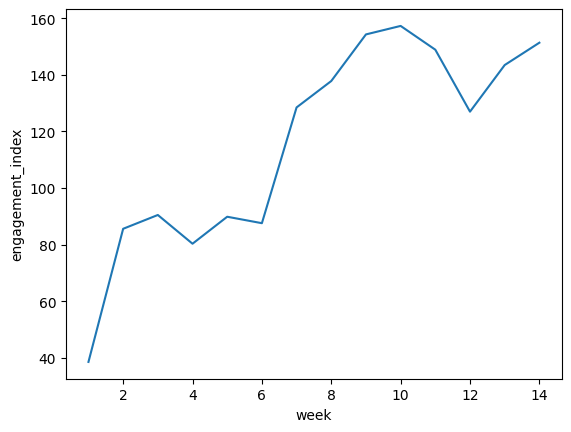

In [ ]:
sns.lineplot( data = engagement_data[engagement_data['week'] <15].groupby('week')['engagement_index'].mean().reset_index(), x = 'week' , y='engagement_index')

- Engagement index prior to the outbreak : The engagement index is still quite high, this can be explain because we live in the digital economy where everyone can have some sorts of digital devices

- Sharp increase in digital engagement in the second week of February, which continued up to March and even beyond

- There is a small drop in access, which implies that many schools are not ready for equipping students with distance learning

- The level of engagement was overall lower at the beginning of 2020, when Covid-19 was not considered a threat yet. Moreover, the overall level of engagement was even higher in the second half of 2020, with the beginning of 2020-2021 school year, compared to the one observed between February and May. These are clear signals that Covid-19 has some role in altering digital engagement trends

# 2020- Products - Most used product through engagement index & access

In [ ]:
prod_engage_summary.head() # Main dataset table for product & engagement

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

                                  URL    Product Name Provider/Company Name  \
0           http://www.calculator.com  Calculator.com        Calculator.com   
1  https://www.kidsa-z.com/main/Login        Kids A-Z            Lazel Inc.   
2                http://www.prezi.com           Prezi            Prezi Inc.   
3                 http://quizlet.com/         Quizlet               Quizlet   
4                http://www.issuu.com           Issuu                 Issuu   

                       Sector(s)         Primary Essential Function Function  \
0  PreK-12; Higher Ed; Corporate  LC - Sites, Resources & Reference      LC    
1                        PreK-12    LC - Digital Learning Platforms      LC    
2  PreK-12; Higher Ed; Corporate   LC - Content Creation & Curation      LC    
3                        PreK-12                   LC - Study Tools      LC    
4  PreK-12; Higher Ed; Corporate   LC - Content Creation & Curation      LC    

                 Function detail  
0   Sites, Resources & Reference  
1     Digital Learning Platforms  
2    Content Creation & Curation  
3                    Study Tools  
4    Content Creation & Curation

In [ ]:
#1. table for products are the most used
prod_engage_summary.groupby('Product Name')['engagement_index'].mean().reset_index().sort_values('engagement_index', ascending = False).head(10)

Product Name  engagement_index
123       Google Docs       9833.445131
121  Google Classroom       5166.622061
349           YouTube       3221.426710
39             Canvas       2313.604214
197              Meet       1737.514975
269         Schoology       1496.066596
164           Kahoot!       1411.852162
128      Google Forms        813.993470
125      Google Drive        762.482346
45          ClassLink        583.552648

In [ ]:
prod_engage_summary.groupby('Product Name')['engagement_index'].mean().reset_index().sort_values('engagement_index', ascending = False).head(10).iloc[0]

Product Name        Google Docs
engagement_index    9833.445131
Name: 123, dtype: object

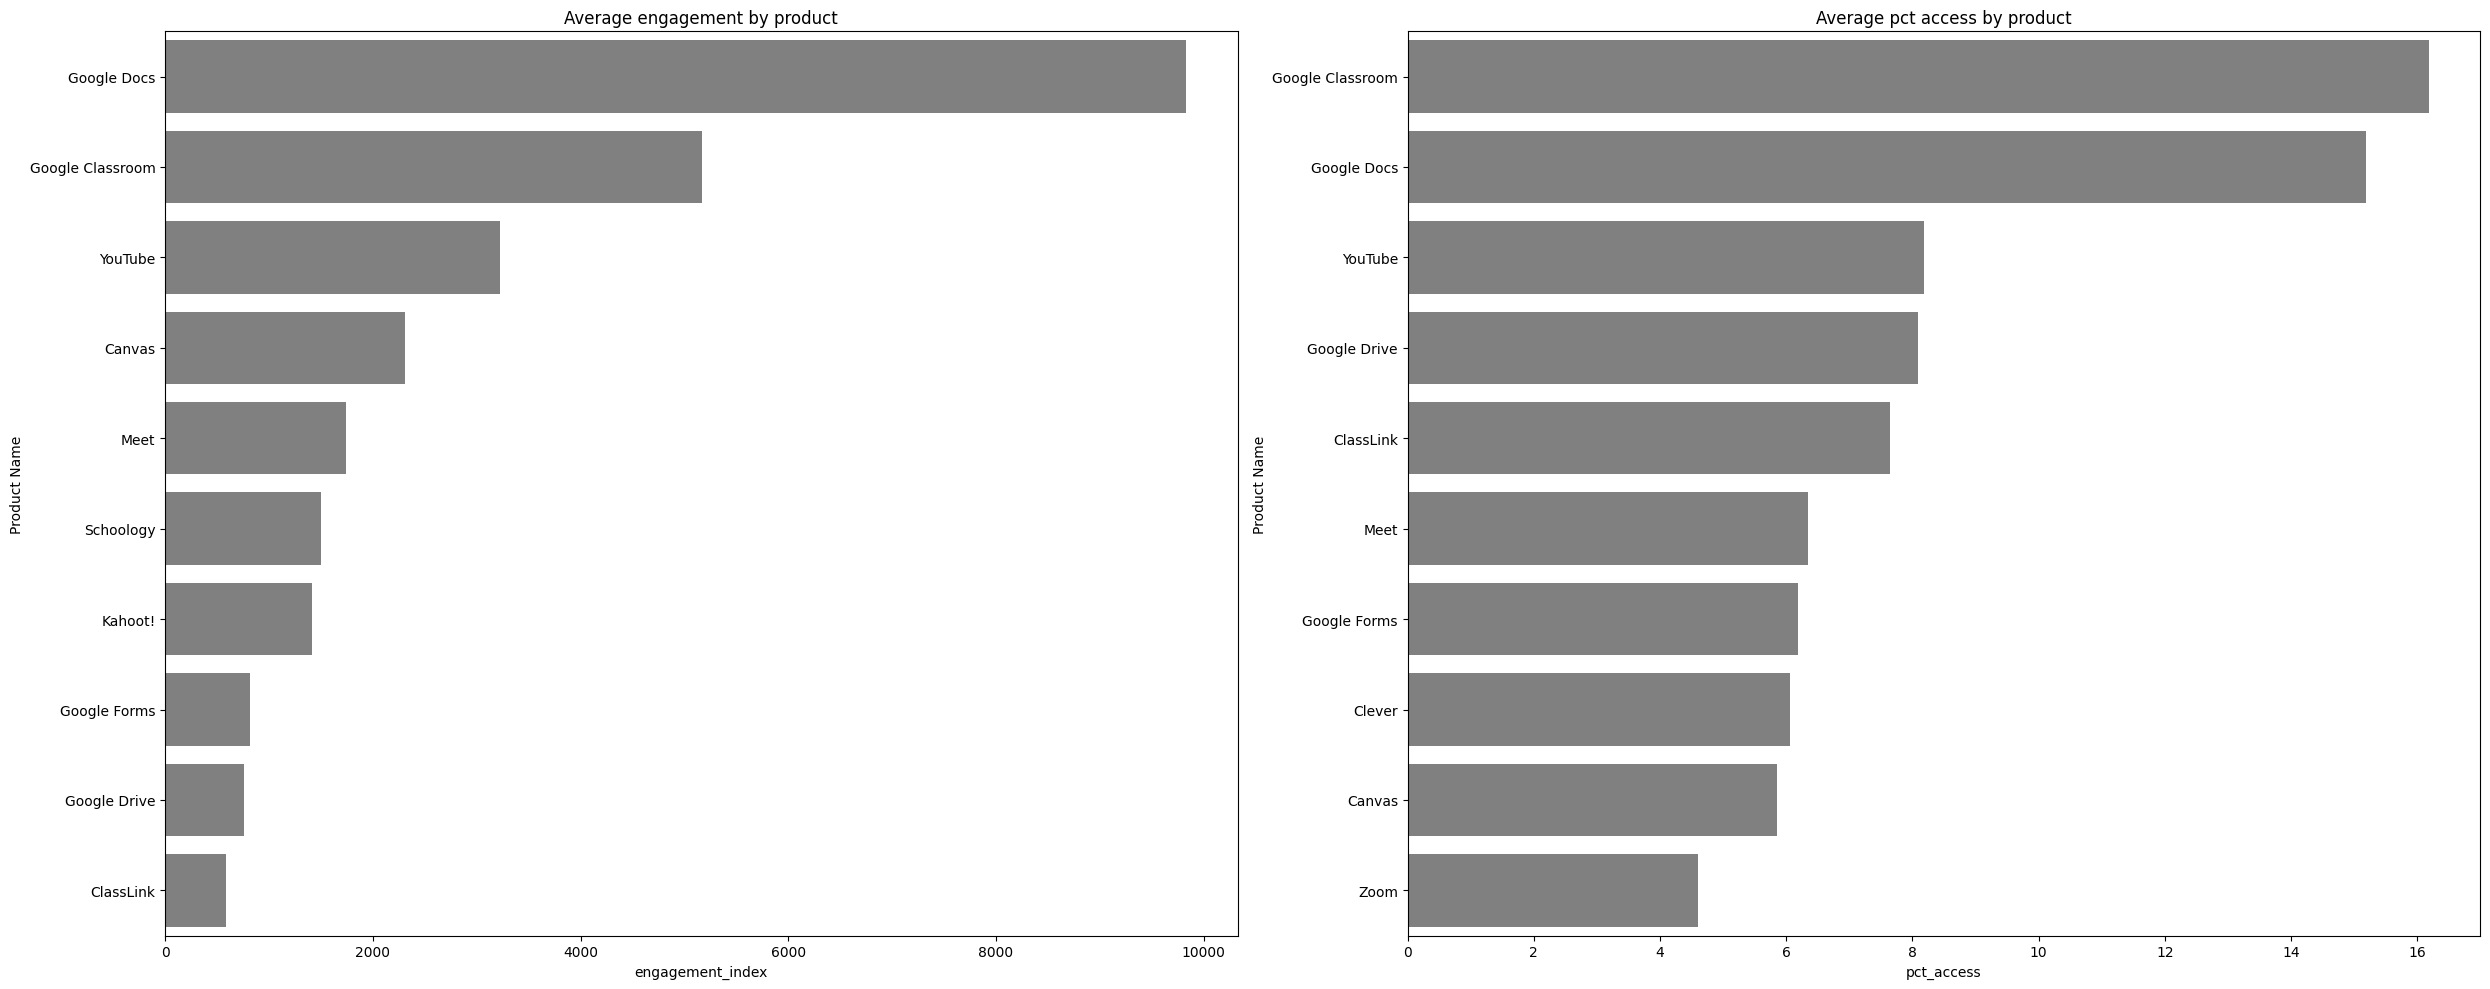

In [ ]:
#2. Plot
plt.figure(figsize=(25,10))
plt.subplot(121)
sns.barplot( data = prod_engage_summary.groupby('Product Name')['engagement_index'].mean().reset_index().sort_values('engagement_index', ascending = False).head(10) , x = 'engagement_index', y = 'Product Name', color ='grey' )
plt.title('Average engagement by product')


plt.subplot(122)
sns.barplot( data = prod_engage_summary.groupby('Product Name')['pct_access'].mean().reset_index().sort_values('pct_access', ascending = False).head(10) , x = 'pct_access', y = 'Product Name', color ='grey' )
plt.title('Average pct access by product')
plt.tight_layout()
plt.show()
#google docs & google classroom by far is the most used engaged and accessed product

In [ ]:
prod_engage_summary['Function'].value_counts().reset_index()

index  Function
0         LC    8670440
1         CM     929213
2        SDO     857780
3  LC/CM/SDO     730350

In [ ]:
def addlabels(y):
    for i in range(len(prod_engage_summary['Function'].value_counts())):
        plt.text(i, y[i]//2, y[i], ha = 'center')

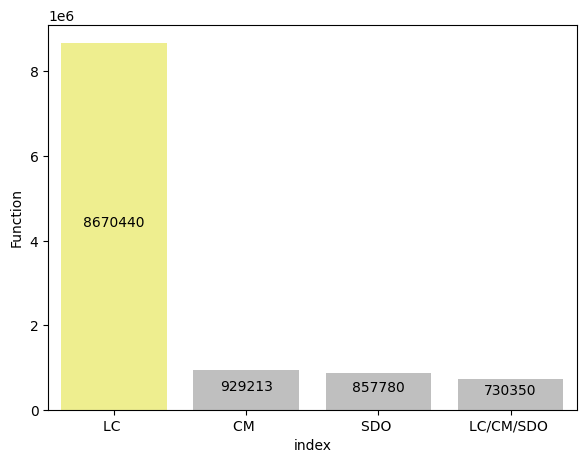

In [ ]:
#3. product function distribution
plt.figure(figsize=(15,5))
plt.subplot(121)
cols = ['grey' if (x < max(prod_engage_summary['Function'].value_counts())) else 'yellow' for x in prod_engage_summary['Function'].value_counts() ]
sns.barplot(
    data = prod_engage_summary['Function'].value_counts().reset_index(),
    x = 'index',
    y = 'Function',
    palette=cols,
    alpha = 0.5
)
y = list(prod_engage_summary['Function'].value_counts().reset_index()['Function'])
addlabels(y)

plt.show()

In [ ]:
#4. most used primary function
top_5_function_engage = prod_engage_summary.groupby(['Function detail'])['engagement_index'].mean().reset_index().sort_values('engagement_index', ascending = False).head(5)
top_5_function_engage

Function detail  engagement_index
14                  Learning Management Systems (LMS)       2409.150029
15   Online Course Providers & Technical Skills De...        937.276087
5                         Content Creation & Curation        717.338410
33   Virtual Classroom - Video Conferencing & Scre...        506.105978
18                   School Management Software - SSO        468.008911

In [ ]:
top_5_function_engage.iloc[0,1]

2409.150028559748

In [ ]:
top_5_function_access = prod_engage_summary.groupby(['Function detail'])['pct_access'].mean().reset_index().sort_values('pct_access', ascending = False).head(5)


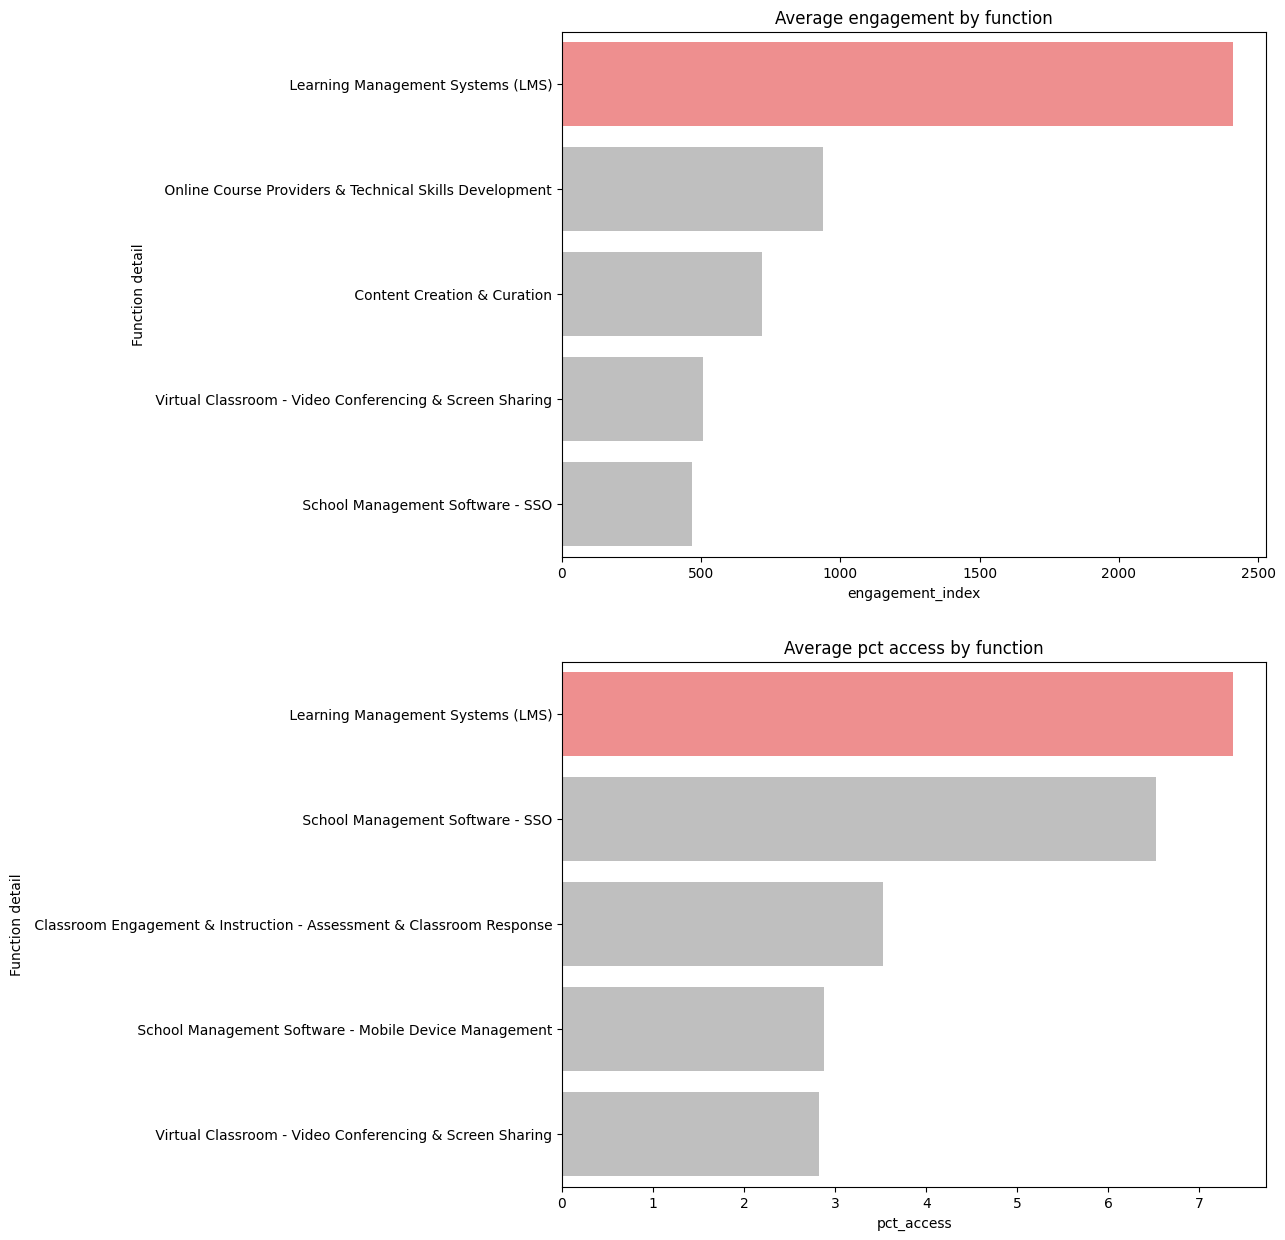

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(221)
cols_function = ['grey' if (x < top_5_function_engage.iloc[0,1]) else 'red' for x in top_5_function_engage['engagement_index']]
sns.barplot( data = top_5_function_engage,
            x = 'engagement_index',
            y = 'Function detail',
            palette = cols_function,
            alpha = 0.5 )
plt.title('Average engagement by function')


plt.subplot(223)
cols_function_access = ['grey' if (x < top_5_function_access.iloc[0,1]) else 'red' for x in top_5_function_access['pct_access']]
sns.barplot( data = top_5_function_access,
            x = 'pct_access',
            y = 'Function detail',
            palette = cols_function,
            alpha = 0.5)
plt.title('Average pct access by function')

plt.show()

In [ ]:
#5. the most provider :
prod_engage_summary['Provider/Company Name'].value_counts().reset_index().sort_values('Provider/Company Name',ascending = False).head(10)

index  Provider/Company Name
0                 Google LLC                1323491
1                  Microsoft                 216687
2               IXL Learning                 166590
3  Houghton Mifflin Harcourt                 148080
4                        PBS                 135305
5               Learning A-Z                 124702
6             Scholastic Inc                 111094
7          The College Board                 110049
8        McGraw-Hill PreK-12                 107226
9   The Wikimedia Foundation                 104433

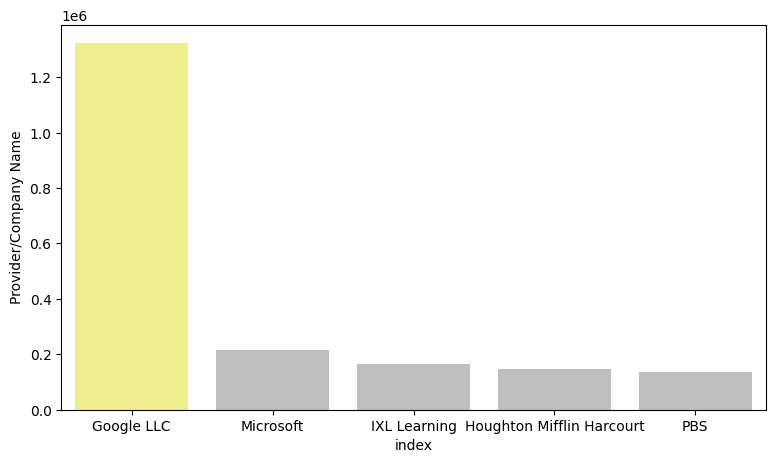

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
cols_providers = ['grey' if (x < max(prod_engage_summary['Provider/Company Name'].value_counts().head(5))) else 'yellow' for x in prod_engage_summary['Provider/Company Name'].value_counts().head(5)]
sns.barplot(data = prod_engage_summary['Provider/Company Name'].value_counts().reset_index().sort_values('Provider/Company Name',ascending = False).head(5),
            x ='index',
            y='Provider/Company Name',
            palette = cols_providers,
            alpha = 0.5)
plt.show()

# Sectors distribution - accumlative with 3 key sectors : PreK-12, Higher Ed, Corporate

In [ ]:
prod_engage_summary.groupby('Sector(s)').count()[['lp_id']].sort_values(by="lp_id", ascending=False)

lp_id
Sector(s)                             
PreK-12                        4776709
PreK-12; Higher Ed; Corporate  4306066
PreK-12; Higher Ed             2002406
Corporate                        63319
Higher Ed; Corporate             39283

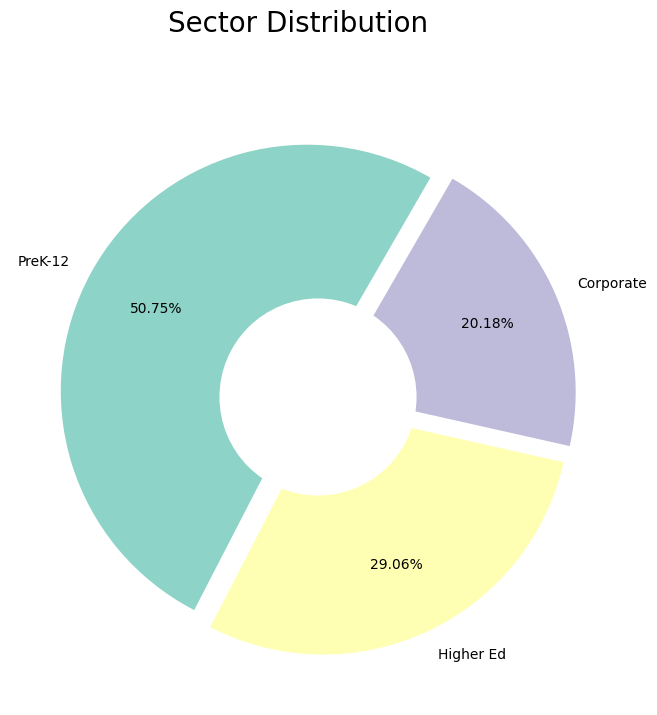

In [ ]:
#1. Pie chart for sectors percentage overall

#combine datapoint into prek-12, higher ed & corporate
c1=c2=c3=0
for s in prod_engage_summary["Sector(s)"]:
    if(not pd.isnull(s)):
        s = s.split(";")
        for i in range(len(s)):
            sub = s[i].strip()
            if(sub == 'PreK-12'): c1+=1
            if(sub == 'Higher Ed'): c2+=1
            if(sub == 'Corporate'): c3+=1

#plot the pie chart
fig, ax  = plt.subplots(figsize=(16, 8))
fig.suptitle('Sector Distribution', size = 20)
explode = (0.05, 0.05, 0.05)
labels = ['PreK-12','Higher Ed','Corporate']
sizes = [c1,c2, c3]
ax.pie(sizes, explode=explode,startangle=60, labels=labels,autopct='%1.2f%%', pctdistance=0.7, colors=sns.color_palette("Set3"))
ax.add_artist(plt.Circle((0,0),0.4,fc='white'))
plt.show()

#PreK-12 account for 50% of the total sectors

- Accumulative product counts into 3 main categories : PreK-12, Higher Ed, Corporate

In [ ]:
#1. create count table : sector_plot
sector_plot = prod_engage_summary.groupby('Sector(s)').count()[['lp_id']].sort_values(by="lp_id", ascending=False)

In [ ]:
sector_plot = sector_plot.reset_index()
sector_plot.head()

Sector(s)    lp_id
0                        PreK-12  4776709
1  PreK-12; Higher Ed; Corporate  4306066
2             PreK-12; Higher Ed  2002406
3                      Corporate    63319
4           Higher Ed; Corporate    39283

In [ ]:
#2.counting all in 3 main sectors : prek-12, higher ed & corporate
sector_plot = sector_plot.reset_index()
c1=c2=c3=0
for s in prod_engage_summary["Sector(s)"]:
    if(not pd.isnull(s)):
        s = s.split(";")
        for i in range(len(s)):
            sub = s[i].strip()
            if(sub == 'PreK-12'): c1+=1
            if(sub == 'Higher Ed'): c2+=1
            if(sub == 'Corporate'): c3+=1
print(c1)
print(c2)
print(c3)

11085181
6347755
4408668


Cleaning the dataframe sector_plot and append new columns product_count

In [ ]:
#1. append new series : product_count
product_count = [c1,c2,c3]
sector_plot['product_count'] = pd.Series([c1,c2,c3],
                                         index =[0,1,2])

sector_plot

Sector(s)    lp_id  product_count
0                        PreK-12  4776709     11085181.0
1  PreK-12; Higher Ed; Corporate  4306066      6347755.0
2             PreK-12; Higher Ed  2002406      4408668.0
3                      Corporate    63319            NaN
4           Higher Ed; Corporate    39283            NaN

In [ ]:
#2. drop NA
sector_plot=sector_plot.dropna()

In [ ]:
#3. change the index name
sector_plot=sector_plot.set_index('Sector(s)').drop(columns = 'lp_id').rename(index = {'PreK-12; Higher Ed; Corporate':'Higher Ed','PreK-12; Higher Ed':'Corporate'})
sector_plot

product_count
Sector(s)               
PreK-12       11085181.0
Higher Ed      6347755.0
Corporate      4408668.0

In [ ]:
#4. change product_count to int
sector_plot['product_count']=sector_plot['product_count'].astype('int64')

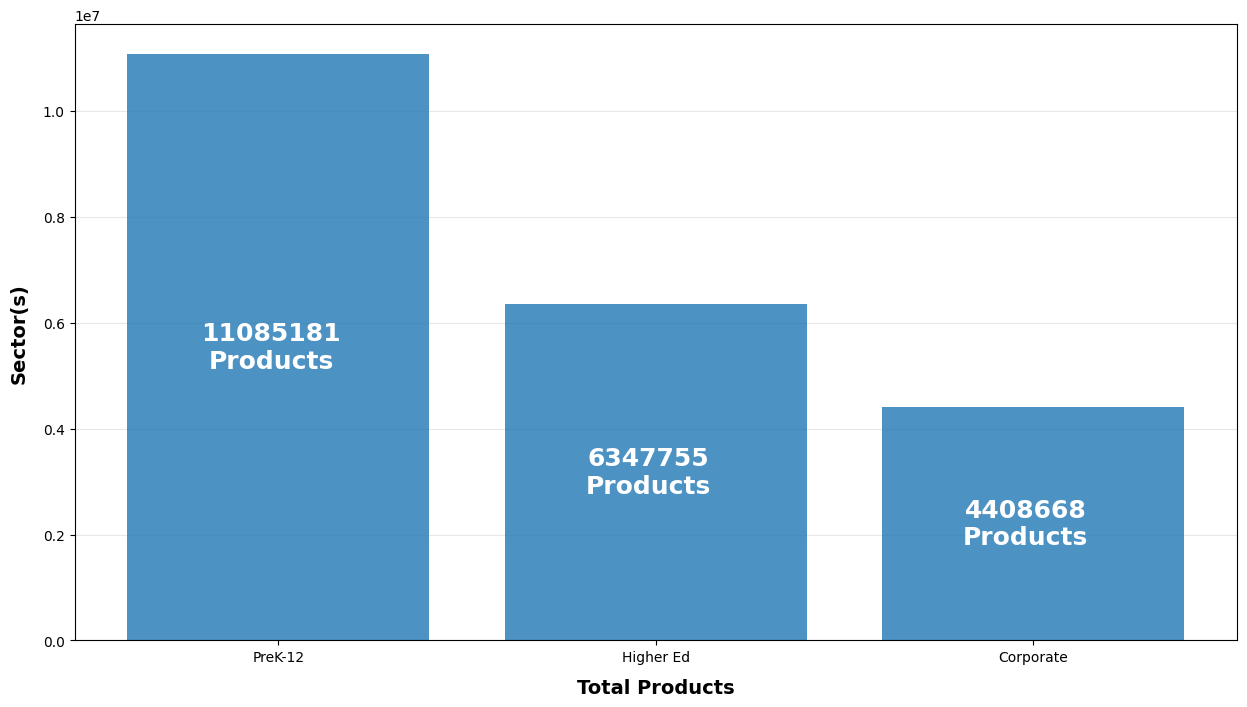

In [ ]:
#5. Plot sectors and product used for each sector

#initiate the plot
fig, ax = plt.subplots(figsize=(15, 8))

bars0 = ax.bar(sector_plot.index, sector_plot['product_count'], alpha=0.8)

#style the bar chart
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Total Products", fontsize=14, labelpad=10, fontweight='bold')
ax.set_ylabel("Sector(s)", fontsize=14, labelpad=10, fontweight='bold')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# input the product_count on the charts
for i, bar in enumerate(bars0) :
    x=bar.get_x()
    y=bar.get_height()
    if i < 3 :
        ax.text(
        s=f"{sector_plot.iloc[i].values[0]}\nProducts",
        va='center', ha='center',
        x=x+0.38, y=y/2,
        color='white',
        fontsize=18,
        fontweight='bold')
    else :
        ax.text(
        s=f"{sector_plot.iloc[i].values[0]}",
        va='center', ha='center',
        x=x+0.38, y=y+5,
        fontsize=14)
plt.show()


# Google Doc & Classroom : Pre & After Covid outbreak (increase engagement index)

In [ ]:
prod_engage_summary[prod_engage_summary['Product Name'] == 'Google Classroom'].groupby('time').mean().reset_index()[['time','pct_access','engagement_index']]

time  pct_access  engagement_index
0   2020-01-01    1.224207        107.583232
1   2020-01-02   12.148765       1593.670765
2   2020-01-03   12.476628       1559.063081
3   2020-01-04    1.286353        104.509588
4   2020-01-05    2.480422        233.603434
..         ...         ...               ...
361 2020-12-27    1.287670        152.176307
362 2020-12-28    1.809081        262.450378
363 2020-12-29    1.799405        271.366000
364 2020-12-30    1.732772        262.637554
365 2020-12-31    1.618111        233.683833

[366 rows x 3 columns]

In [ ]:
#Calculating how much different GG Classroom pre and after pandemic outbreak
#time stamp : prior to 11 march - before outbreak
#time stamp : after 11 march to before summer and after summer - during outbreak except for summer holiday
av_before = temp_table[temp_table['time'] < '2020-03-11'].mean()['engagement_index']
av_after = temp_table[(temp_table['time'] >= '2020-03-11') & ((temp_table['time'] < '2020-06-10') | (temp_table['time'] > '2020-09-11'))].mean()['engagement_index']
increase_per = (av_after - av_before) / (av_after) * 100

<ipython-input-109-95c74974b65b>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  av_before = temp_table[temp_table['time'] < '2020-03-11'].mean()['engagement_index']
<ipython-input-109-95c74974b65b>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  av_after = temp_table[(temp_table['time'] >= '2020-03-11') & ((temp_table['time'] < '2020-06-10') | (temp_table['time'] > '2020-09-11'))].mean()['engagement_index']


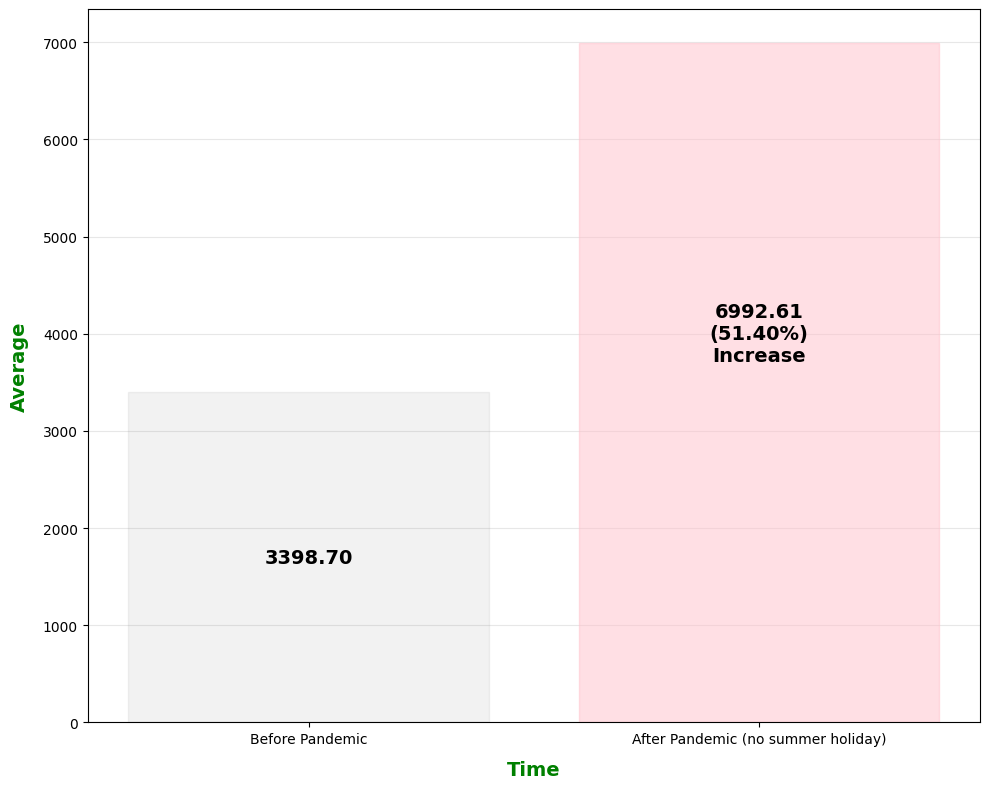

In [ ]:
# Google Classroom
fig, ax = plt.subplots(figsize=(10, 8))

data_top_10 = temp_table[0:10]
mean_score = temp_table.engagement_index.mean()

bars1 = ax.bar('Before Pandemic', av_before, color='grey', alpha=0.1, edgecolor= 'grey')
bars2 = ax.bar('After Pandemic (no summer holiday)', av_after, color='pink', alpha=0.5, edgecolor= 'pink')

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Time", fontsize=14, labelpad=10, fontweight='bold', color='green')
ax.set_ylabel("Average", fontsize=14, labelpad=10, fontweight='bold', color='green')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.text(
    s="{:.2f}".format(av_before),
    va='center', ha='center',
    x=bars1[0].get_x()+0.4, y=bars1[0].get_height()/2,
    fontweight='bold',
    fontsize=14,
)

ax.text(
    s="{:.2f}\n({:.2f}%)\nIncrease".format(av_after, increase_per),
    va='center', ha='center',
    x=bars2[0].get_x()+0.4, y=4000,
    fontweight='bold',
    fontsize=14,
)

plt.tight_layout()
plt.show()

In [ ]:
prod_engage_summary[prod_engage_summary['Product Name'] == 'Google Docs'].groupby('time').mean().reset_index()[['time','pct_access','engagement_index']]

time  pct_access  engagement_index
0   2020-01-01    1.561198        281.453385
1   2020-01-02   11.138384       2028.436768
2   2020-01-03   11.938737       2221.916162
3   2020-01-04    1.843316        377.960663
4   2020-01-05    2.859695        549.438680
..         ...         ...               ...
361 2020-12-27    1.160683        616.932195
362 2020-12-28    1.493143        849.897810
363 2020-12-29    1.613623        926.080821
364 2020-12-30    1.652402        969.145686
365 2020-12-31    1.506570        882.504493

[366 rows x 3 columns]

In [ ]:
#Calculating how much different GG Doc pre and after pandemic outbreak
#time stamp : prior to 11 march - before outbreak
#time stamp : after 11 march to before summer and after summer - during outbreak except for summer holiday
GGDoc_av_before = GGDoc_temp_table[GGDoc_temp_table['time'] < '2020-03-11'].mean()['engagement_index']
GGDoc_av_after = GGDoc_temp_table[(GGDoc_temp_table['time'] >= '2020-03-11') & ((GGDoc_temp_table['time'] < '2020-06-10') | (GGDoc_temp_table['time'] > '2020-09-11'))].mean()['engagement_index']
GGDoc_increase_per = (GGDoc_av_after - GGDoc_av_before) / (GGDoc_av_after) * 100

<ipython-input-105-d955f62ede96>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  GGDoc_av_before = GGDoc_temp_table[GGDoc_temp_table['time'] < '2020-03-11'].mean()['engagement_index']
<ipython-input-105-d955f62ede96>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  GGDoc_av_after = GGDoc_temp_table[(GGDoc_temp_table['time'] >= '2020-03-11') & ((GGDoc_temp_table['time'] < '2020-06-10') | (GGDoc_temp_table['time'] > '2020-09-11'))].mean()['engagement_index']


In [ ]:
GGDoc_temp_table.engagement_index.mean()

9689.493700952711

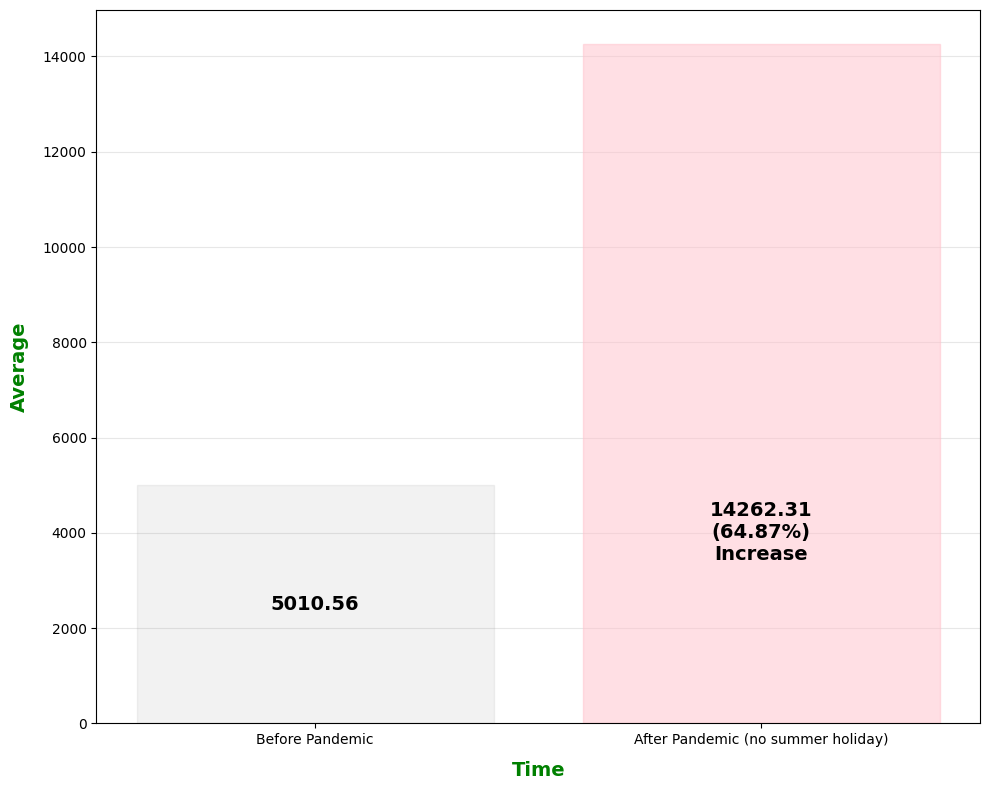

In [ ]:
# Google Doc
fig, ax = plt.subplots(figsize=(10, 8))

#data_top_10 = GGDoc_temp_table[0:10]
#mean_score = GGDoc_temp_table.engagement_index.mean()

bars1 = ax.bar('Before Pandemic', GGDoc_av_before, color='grey', alpha=0.1, edgecolor= 'grey')
bars2 = ax.bar('After Pandemic (no summer holiday)', GGDoc_av_after, color='pink', alpha=0.5, edgecolor= 'pink')

ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Time", fontsize=14, labelpad=10, fontweight='bold', color='green')
ax.set_ylabel("Average", fontsize=14, labelpad=10, fontweight='bold', color='green')
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.text(
    s="{:.2f}".format(GGDoc_av_before, color='grey', alpha=0.1, edgecolor= 'grey'),
    va='center', ha='center',
    x=bars1[0].get_x()+0.4, y=bars1[0].get_height()/2,
    fontweight='bold',
    fontsize=14,
)

ax.text(
    s="{:.2f}\n({:.2f}%)\nIncrease".format(GGDoc_av_after, GGDoc_increase_per),
    va='center', ha='center',
    x=bars2[0].get_x()+0.4, y=4000,
    fontweight='bold',
    fontsize=14,
)

plt.tight_layout()
plt.show()

1. Findings :
- Major providers : Google , Microsoft and IXL Learning ( with GG LLC is the major ones)
- Major product : GG Docs with the most average engagement index and the primary function is for learning management system
- Major sector : Pre-K12 are the ones most used with technology/digital learning tools
- Zoom & Meet are coming back ( Covid pushes these products to be essential again)


2. Digital Engagement vs. Product
- Product : Google Classroom and Google Docs both have the highest pct_access_average & engagement index ->showing these 2 products are by far the easiest and the most common to access for all students
-Fuction : Regarding function, Learning management system , online provider and school management system are the main function, and  these characteristics are also found in products which have the most engagement index. with GG docs & GG classroom- learning management

3. For Google product : Google classrom , there is a significant increase regarding engagement index -> showing more and more students and insitutions adapting a new method of learning and teaching

# District - States and Locales distribution

In [ ]:
dist_engagement_summary.head() #Main Dataset table for district & engagement

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

         state  locale pct_black/hispanic pct_free/reduced  \
0  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
1  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
2  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
3  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
4  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   

  county_connections_ratio pp_total_raw  pct_black_hispanic  pct_free_reduced  \
0                [0.18, 1[          NaN                 0.6               0.2   
1                [0.18, 1[          NaN                 0.6               0.2   
2                [0.18, 1[          NaN                 0.6               0.2   
3                [0.18, 1[          NaN                 0.6               0.2   
4                [0.18, 1[          NaN                 0.6               0.2   

   pp_total  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [ ]:
dist_engage_temp.head() #Temporary table only with cleaned data

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

         state  locale  pct_black_hispanic  pct_free_reduced  pp_total  
0  Connecticut  Suburb                 0.6               0.2       NaN  
1  Connecticut  Suburb                 0.6               0.2       NaN  
2  Connecticut  Suburb                 0.6               0.2       NaN  
3  Connecticut  Suburb                 0.6               0.2       NaN  
4  Connecticut  Suburb                 0.6               0.2       NaN

In [ ]:
dist_engage_temp.groupby('state')['pct_access'].mean().reset_index().sort_values(by='pct_access', ascending = False)

state  pct_access
15          North Dakota    3.323983
0                Arizona    2.078785
13              New York    1.295577
11         New Hampshire    1.169146
3   District Of Columbia    1.079962
22             Wisconsin    0.749166
2            Connecticut    0.718472
6                Indiana    0.712898
5               Illinois    0.584069
7          Massachusetts    0.551959
16                  Ohio    0.540000
9              Minnesota    0.507790
12            New Jersey    0.465869
19                  Utah    0.409911
1             California    0.317466
20              Virginia    0.306163
10              Missouri    0.306053
8               Michigan    0.301243
17             Tennessee    0.283392
21            Washington    0.275442
18                 Texas    0.228655
4                Florida    0.218776
14        North Carolina    0.186776

Calculate difference in access for area where there is high and low black/hispanic student percentage for Connecticut and Massachusetts

In [ ]:
dist_engage_temp[(dist_engage_temp['state'] == 'Connecticut') & (dist_engage_temp['pct_black_hispanic'] >= 0.4)]['pct_access'].mean()

0.46768891748886715

In [ ]:
dist_engage_temp[(dist_engage_temp['state'] == 'Connecticut') & (dist_engage_temp['pct_black_hispanic'] < 0.4)]['pct_access'].mean()

0.789983203054504

In [ ]:
dist_engage_temp[(dist_engage_temp['state'] == 'Massachusetts') & (dist_engage_temp['pct_black_hispanic'] >= 0.4)]['pct_access'].mean()

0.41081281358548827

In [ ]:
dist_engage_temp[(dist_engage_temp['state'] == 'Massachusetts') & (dist_engage_temp['pct_black_hispanic'] < 0.4)]['pct_access'].mean()

0.556687086266518

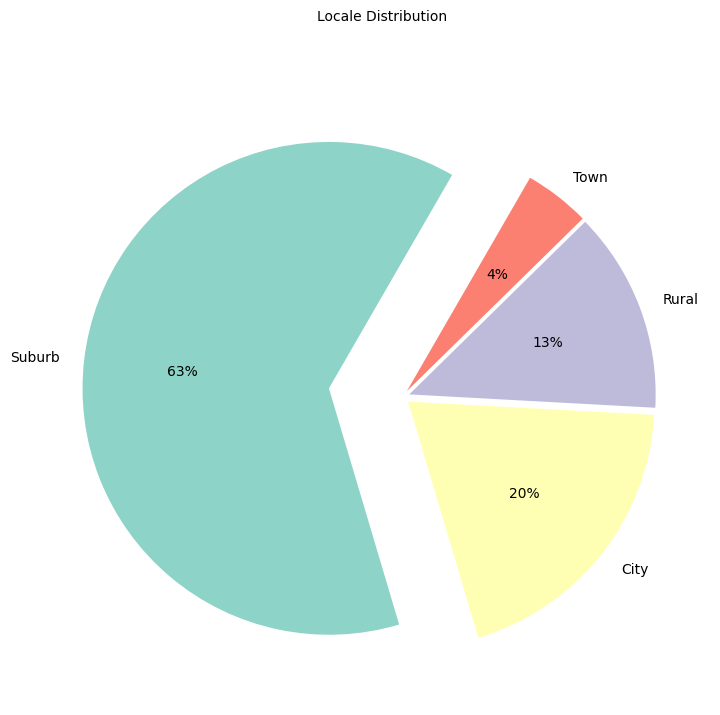

In [ ]:
#1. Plot pie locale - locals distribution accross US

#initiate plot
fig, ax  = plt.subplots(figsize=(16, 8))

#style the pie plot
fig.suptitle('Locale Distribution', size = 10, color = "black")
explode = ( 0.3, 0.03, 0.03, 0.03)
labels = list(dist_engage_temp['locale'].value_counts().index)
sizes = dist_engage_temp["locale"].dropna().value_counts()
ax.pie(sizes,
       explode = explode,
       colors = sns.color_palette("Set3"),
       startangle = 60,
       labels = labels,
       autopct = '%1.0f%%',
       pctdistance = 0.6
      )


plt.show()

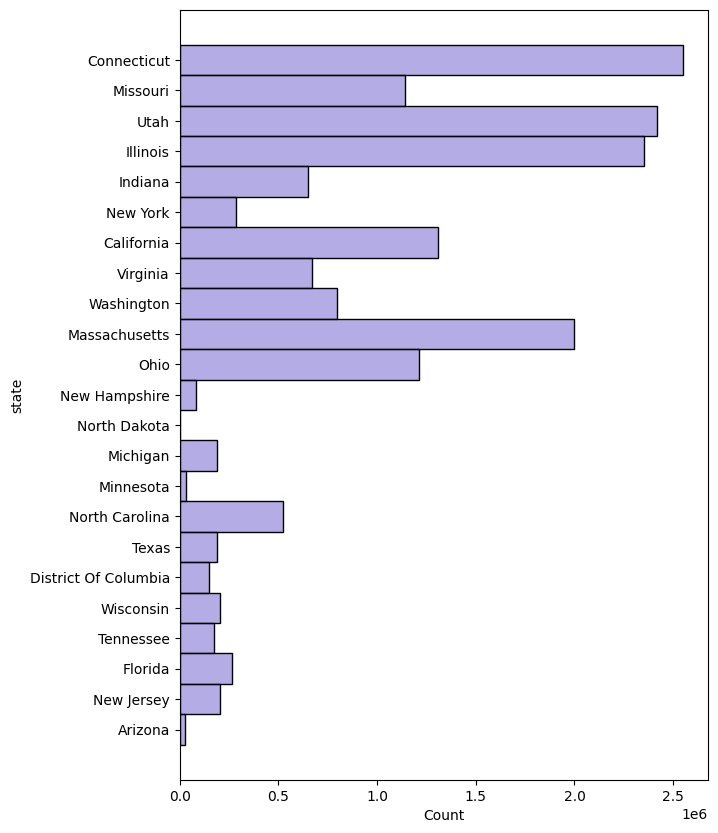

In [ ]:
#2. state distribution
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.histplot( data = dist_engage_temp, y = 'state', color = 'slateblue', alpha = 0.5)
plt.show()


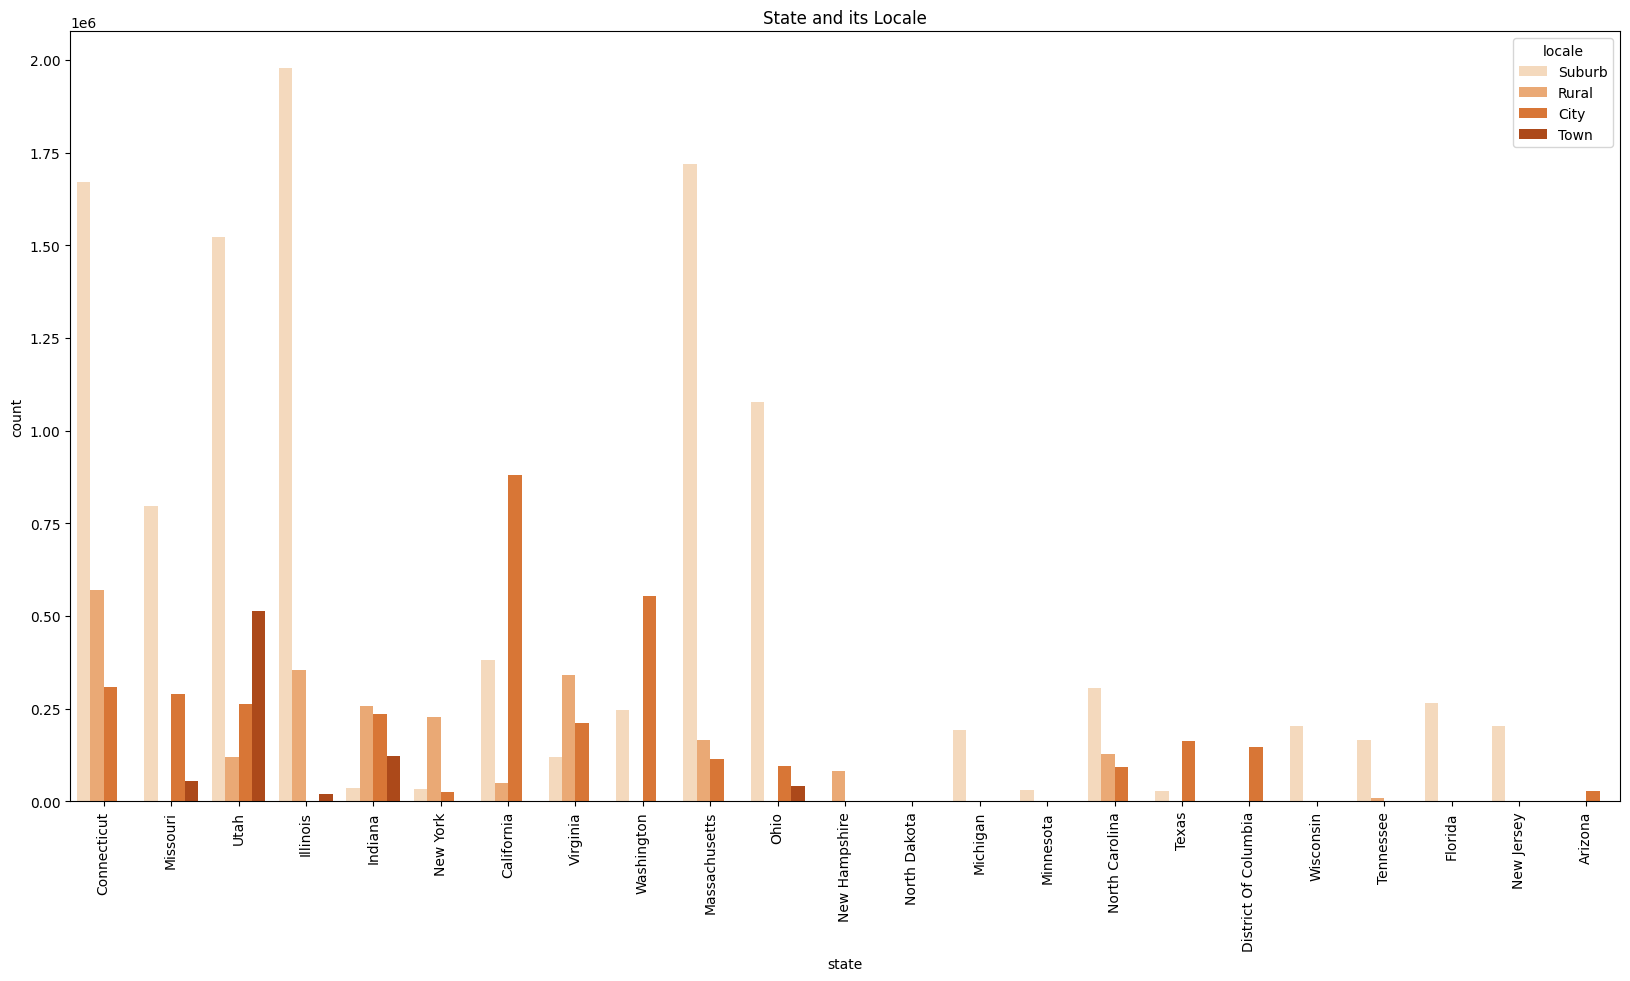

In [ ]:
#2.distribution between states and locales
plt.figure(figsize=(20,10))
ax=sns.countplot(data=dist_engage_temp,x='state',hue='locale',palette='Oranges')
plt.xticks(rotation=90)
plt.title("State and its Locale")
plt.show()
#for Connecticut, suburb area take account of the most, comparing to other locale. North Dakota is mostly rural area

## Engagement Index and Pct Access thru locales and districts

In [ ]:
dist_engage_temp.head()

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

         state  locale  pct_black_hispanic  pct_free_reduced  pp_total  
0  Connecticut  Suburb                 0.6               0.2       NaN  
1  Connecticut  Suburb                 0.6               0.2       NaN  
2  Connecticut  Suburb                 0.6               0.2       NaN  
3  Connecticut  Suburb                 0.6               0.2       NaN  
4  Connecticut  Suburb                 0.6               0.2       NaN

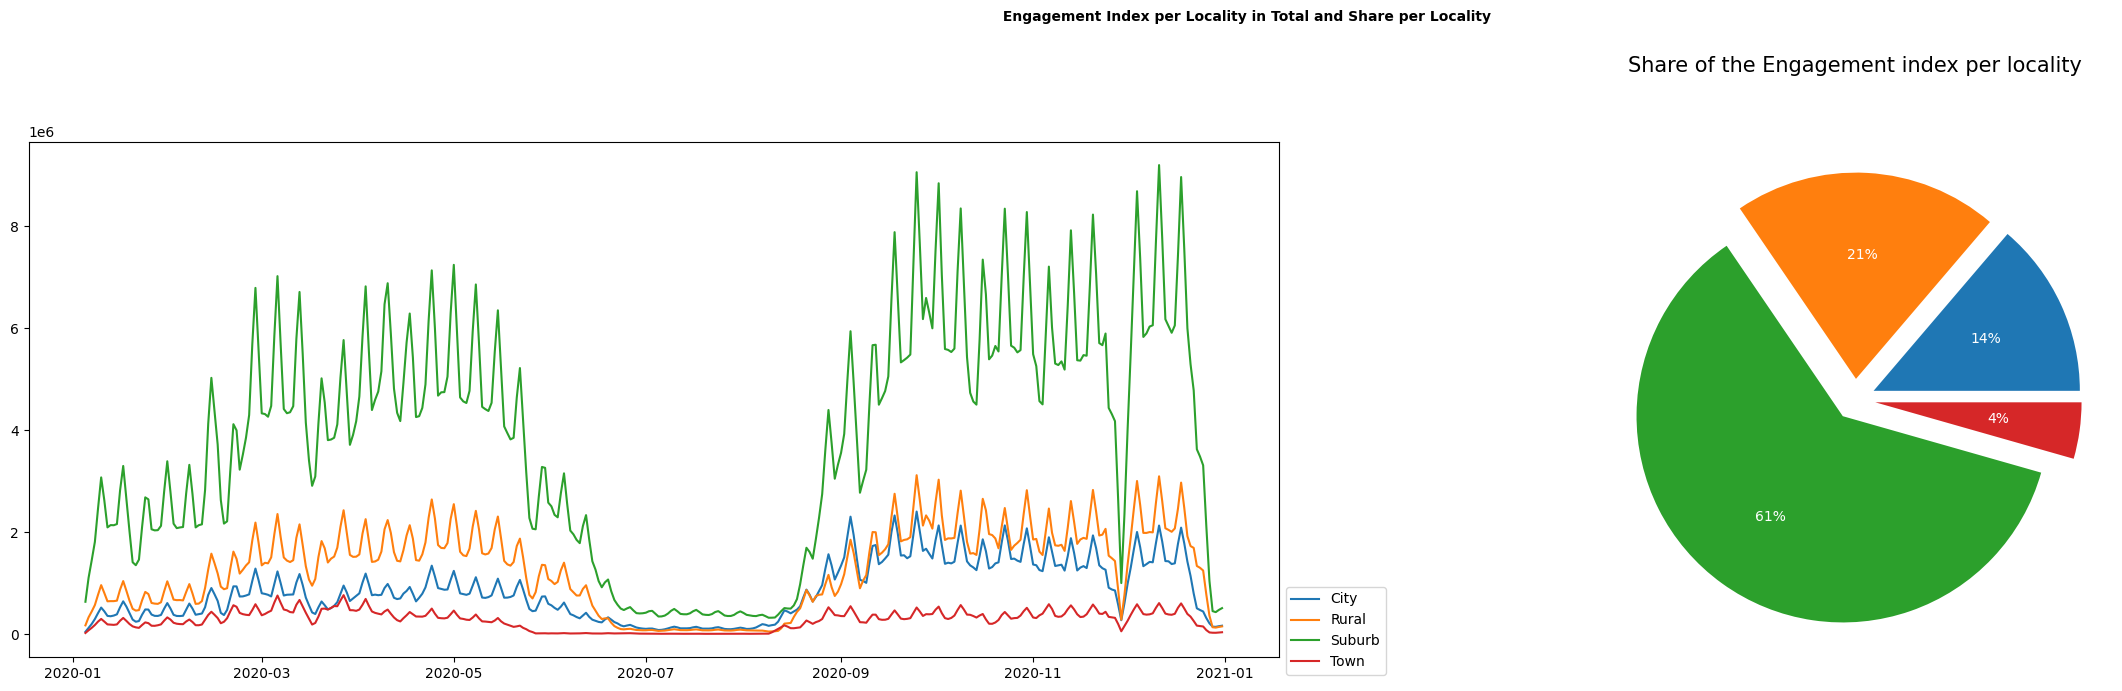

In [ ]:
#1. Engagement data per locale and dates
data_per_locale = dist_engage_temp.groupby(['locale','time']).sum().reset_index()[['time','locale','engagement_index']]

#Create a list of locals
list_locale = data_per_locale['locale'].unique()
plt.figure(figsize=(25,7))
plt.suptitle(' Engagement Index per Locality in Total and Share per Locality\n', size=10, fontweight='bold')

plt.subplot(121)

#for each locale plot the timeline of engagement
for i in list_locale :
    plt.plot(data_per_locale[data_per_locale['locale'] == i]['time'], data_per_locale[data_per_locale['locale'] == i]['engagement_index'].rolling(window=5).mean())


plt.legend(list_locale, bbox_to_anchor = (1, 0.15))

plt.subplot(122)

plt.pie(data_per_locale.groupby('locale')['engagement_index'].sum(), autopct='%1.0f%%', textprops={'color':"w"}, radius=1, explode=(0.1,0.1,0.1,0.1))
plt.title('Share of the Engagement index per locality', pad=50, size=15)

plt.tight_layout()
plt.show()


#Suburban area indeed has the highest engagement index

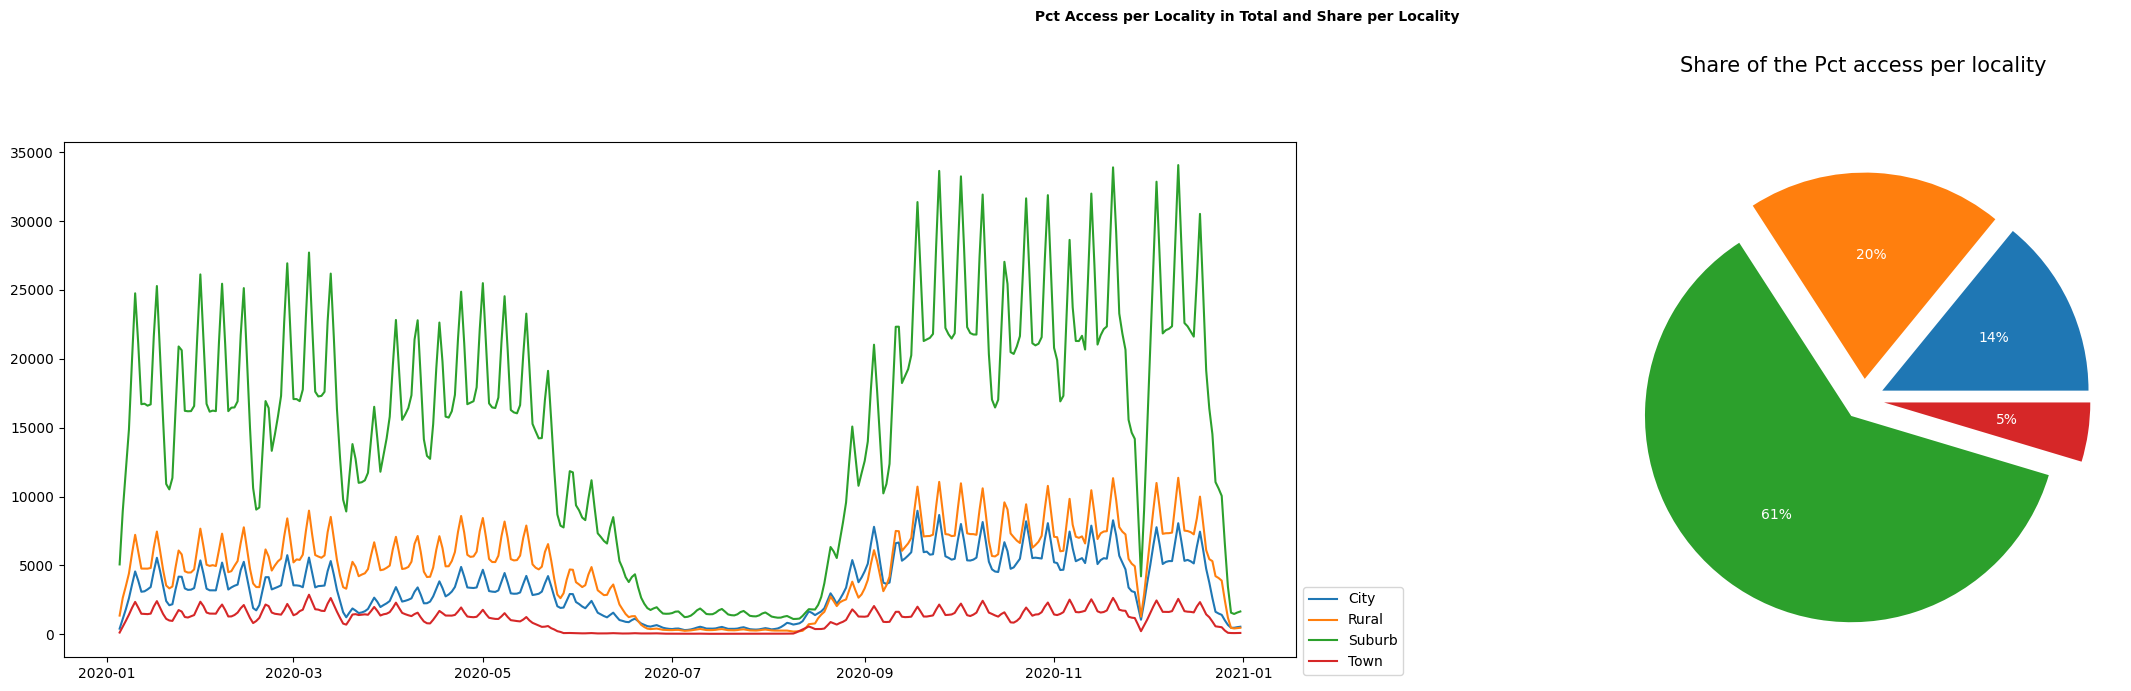

In [ ]:
#2. PCT Access data per locale and dates
pct_data_per_locale = dist_engage_temp.groupby(['locale','time']).sum().reset_index()[['time','locale','pct_access']]

#Create a list of locals
list_locale = pct_data_per_locale['locale'].unique()
plt.figure(figsize=(25,7))
plt.suptitle(' Pct Access per Locality in Total and Share per Locality\n', size=10, fontweight='bold')

plt.subplot(121)

#for each locale plot the timeline of engagement
for i in list_locale :
    plt.plot(pct_data_per_locale[pct_data_per_locale['locale'] == i]['time'], pct_data_per_locale[pct_data_per_locale['locale'] == i]['pct_access'].rolling(window=5).mean())


plt.legend(list_locale, bbox_to_anchor = (1, 0.15))

plt.subplot(122)

plt.pie(pct_data_per_locale.groupby('locale')['pct_access'].sum(), autopct='%1.0f%%', textprops={'color':"w"}, radius=1, explode=(0.1,0.1,0.1,0.1))
plt.title('Share of the Pct access per locality', pad=50, size=15)

plt.tight_layout()
plt.show()

- Internet access and engagement seems to have possitive correlation, having stable internet access can support students to engage better => proving below

<ipython-input-19-706d213e4c7b>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  engagement_pct_access_by_district =  dist_engage_temp.groupby(["time","state"])["engagement_index","pct_access"].mean().reset_index()


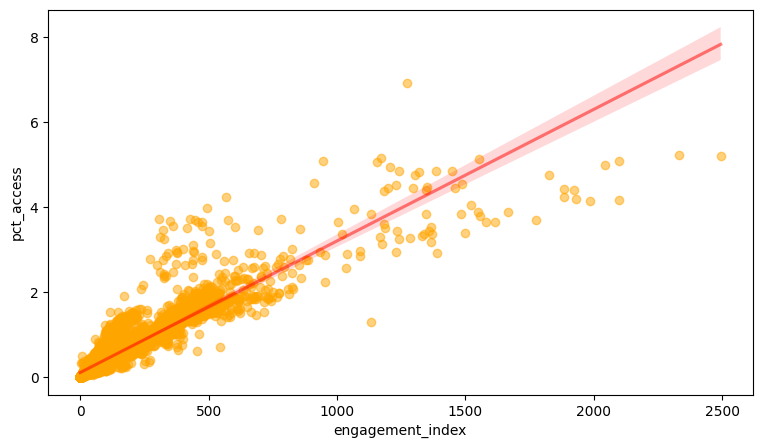

In [ ]:
#3. Plotting correlation between pct access and engagement index

#create plot table
engagement_pct_access_by_district =  dist_engage_temp.groupby(["time","state"])["engagement_index","pct_access"].mean().reset_index()


# Plot
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.regplot(
    data = engagement_pct_access_by_district,
    x='engagement_index',
    y='pct_access',
    scatter_kws = {"color": "orange", "alpha": 0.5},
            line_kws = {"color": "red","alpha":0.5},
            ci = 99) # 99% level

plt.show()

In [ ]:
#4. corr result
corr = engagement_pct_access_by_district["engagement_index"].corr(engagement_pct_access_by_district["pct_access"])
corr

0.919866475831127

In [ ]:
dist_engage_temp.head()

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

         state  locale  pct_black_hispanic  pct_free_reduced  pp_total  
0  Connecticut  Suburb                 0.6               0.2       NaN  
1  Connecticut  Suburb                 0.6               0.2       NaN  
2  Connecticut  Suburb                 0.6               0.2       NaN  
3  Connecticut  Suburb                 0.6               0.2       NaN  
4  Connecticut  Suburb                 0.6               0.2       NaN

In [ ]:
corr_tmp=dist_engage_temp.groupby(["time","state"]).aggregate({'engagement_index':'mean','pct_access':'mean','pp_total':'sum'}).reset_index()
corr_tmp.head()

time                 state  engagement_index  pct_access   pp_total
0 2020-01-01               Arizona         29.203333    0.282083        0.0
1 2020-01-01            California          7.970118    0.049305        0.0
2 2020-01-01           Connecticut         23.020482    0.181344        0.0
3 2020-01-01  District Of Columbia         14.981579    0.082105  1026000.0
4 2020-01-01               Florida          1.452791    0.019302  1548000.0

In [ ]:
corr_1 = corr_tmp["engagement_index"].corr(corr_tmp["pp_total"])
corr_1

0.03434789776196498

<ipython-input-27-510a305a6a49>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_tmp.corr(), cmap="YlOrBr", annot=True)


<Axes: >

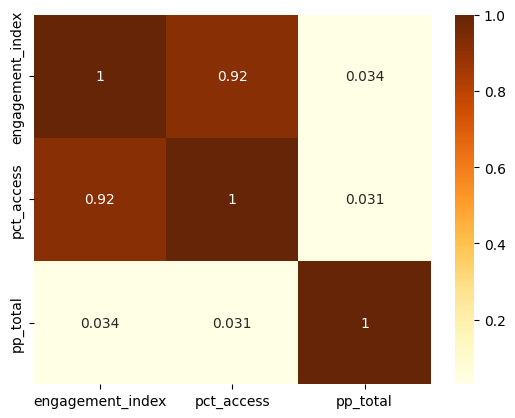

In [ ]:
sns.heatmap(corr_tmp.corr(), cmap="YlOrBr", annot=True)

In [ ]:
temp_corr = dist_engage_temp.groupby(['time','lp_id','dist_id']).aggregate({'engagement_index':'mean','pct_access':'mean','pp_total':'sum'}).reset_index()
temp_corr.head()

time  lp_id  dist_id  engagement_index  pct_access  pp_total
0 2020-01-01  10084     1044              0.52        0.02   10000.0
1 2020-01-01  10084     1450              0.21        0.02       0.0
2 2020-01-01  10084     1965              0.62        0.06   22000.0
3 2020-01-01  10084     2598              0.10        0.01       0.0
4 2020-01-01  10084     3393              4.89        0.04       0.0

In [ ]:
temp_corr=temp_corr[temp_corr['pp_total'] != 0.0]

In [ ]:
corr_2= temp_corr["engagement_index"].corr(temp_corr["pp_total"])
corr_2

0.02477741553784104

## Analyze % pct_black_hispanic , free_reduced fee and spending expediture across US states

In [ ]:
def mean_state_data(df,col):    ›
    return df[[col,'state']].groupby('state').mean().reset_index().sort_values(by=col, ascending = False).style.background_gradient(cmap="Set2_r", subset=[col])

In [ ]:
mean_state_data(dist_engage_temp,'pct_black_hispanic')

In [ ]:
mean_state_data(dist_engage_temp,'pct_free_reduced')

In [ ]:
mean_state_data(dist_engage_temp,'pp_total')


1. Overall :
- Arizona , DC and Texas have the most black and hispanic students comparing to other states
- Minesota , Indianna and Michigan provide 70% free or reduced fee education
- New York, DC and Massachusetts spend the most on education



2. Finding about different student groups : Black/hispanic
- Most of black/hispanic students ( 80-100%) are localized in the suburb - Indiana and City- NY, Arizona and DC

3. Finding about spending per students - per state
- Take Massachusetts and Washington as examples, spending per district that has less black/hispanic students are higher comparing to district that more 40% and above black/hispanic students


In [ ]:
dist_engage_temp[dist_engage_temp['state'] == 'Massachusetts'].groupby('pct_black_hispanic').sum()

lp_id  pct_access  engagement_index      dist_id  \
pct_black_hispanic                                                           
0.0                 95226042626   965338.73      2.663822e+08  10797198904   
0.2                 10472577975   111162.16      2.991663e+07    906693160   
0.4                  3514503549    26610.40      5.851680e+06    500257325   

                       month  pct_free_reduced      pp_total  
pct_black_hispanic                                            
0.0                 11532846               0.0  2.786973e+10  
0.2                  1370566               0.0  2.677712e+09  
0.4                   269709               0.0  9.068500e+08

In [ ]:
float("{:.8f}".format(float("9.068500e+08")))

906850000.0

In [ ]:
float("{:.8f}".format(float("2.677712e+09")))

2677712000.0

In [ ]:
dist_engage_temp[dist_engage_temp['state'] == 'Washington'].groupby('pct_black_hispanic').sum()

lp_id  pct_access  engagement_index     dist_id  \
pct_black_hispanic                                                          
0.0                  4514289450    31571.92        6856723.07   195061268   
0.2                 21922957667    91887.04       18847366.75  1452590120   
0.4                 17160770550    96567.77       22576431.61  1482375392   

                      month  pct_free_reduced      pp_total  
pct_black_hispanic                                           
0.0                  560125            8029.2  1.076164e+09  
0.2                 2494259          160336.0  5.214368e+09  
0.4                 2225558          158785.6  4.110800e+09

In [ ]:
float("{:.8f}".format(float("4.110800e+09")))

4110800000.0

In [ ]:
float("{:.8f}".format(float("5.214368e+09")))

5214368000.0

In [ ]:
dist_engage_temp[dist_engage_temp['state'] == 'New York'].groupby('pct_black_hispanic').sum()

lp_id  pct_access  engagement_index     dist_id  \
pct_black_hispanic                                                          
0.0                 14353301872   295316.10       75806752.03  1491273880   
0.8                  1303189134    75835.73       31412753.06   229007040   

                      month  pct_free_reduced      pp_total  
pct_black_hispanic                                           
0.0                 1663302           64223.4  5.353580e+09  
0.8                  199542           19212.0  0.000000e+00

# Correlation between students from different ethnicity and digital access & enagement

In [ ]:
dist_engage_temp.head()

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

         state  locale  pct_black_hispanic  pct_free_reduced  pp_total  
0  Connecticut  Suburb                 0.6               0.2       NaN  
1  Connecticut  Suburb                 0.6               0.2       NaN  
2  Connecticut  Suburb                 0.6               0.2       NaN  
3  Connecticut  Suburb                 0.6               0.2       NaN  
4  Connecticut  Suburb                 0.6               0.2       NaN

In [ ]:
dist_av_data.head() #dataset with average pct_black_hispanic above and below average

state  locale         lp_id  pct_access  engagement_index  \
0      Arizona    City  56010.692945    2.078785        612.114511   
1   California    City  54720.575860    0.320856         77.337935   
2   California   Rural  56528.217706    1.170748        301.185947   
3   California  Suburb  55379.573479    0.200372         48.748543   
4  Connecticut    City  54442.404089    0.423258        104.055300   

       dist_id     month  pct_black_hispanic  pct_free_reduced  pp_total  \
0  9007.000000  5.934103            0.800000               NaN       NaN   
1  5021.674120  7.281904            0.346406          0.287709       NaN   
2  2321.000000  6.618968            0.000000          0.000000       NaN   
3  2542.520151  6.202854            0.221141          0.096010       NaN   
4  3493.917401  6.772946            0.509199          0.400000       NaN   

    av_situation  
0  Above Average  
1  Above Average  
2  Below Average  
3  Above Average  
4  Above Average

In [ ]:
hispanic_black_free_av = dist_av_data.groupby(['locale','state'])[['engagement_index','pct_black_hispanic','pct_free_reduced']].mean().reset_index()
hispanic_black_free_av .head()

locale                 state  engagement_index  pct_black_hispanic  \
0   City               Arizona        612.114511            0.800000   
1   City            California         77.337935            0.346406   
2   City           Connecticut        104.055300            0.509199   
3   City  District Of Columbia        252.940783            0.749272   
4   City               Indiana        111.613530            0.267879   

   pct_free_reduced  
0               NaN  
1          0.287709  
2          0.400000  
3               NaN  
4          0.622626

In [ ]:
dist_av_data[dist_av_data['locale']==locale]

state locale         lp_id  pct_access  engagement_index  \
0                Arizona   City  56010.692945    2.078785        612.114511   
1             California   City  54720.575860    0.320856         77.337935   
4            Connecticut   City  54442.404089    0.423258        104.055300   
7   District Of Columbia   City  54885.434875    1.079962        252.940783   
12               Indiana   City  54176.435499    0.554248        111.613530   
16         Massachusetts   City  54824.288499    0.138048         30.152058   
21              Missouri   City  54471.816615    0.164535         38.346101   
26              New York   City  54265.631230    3.157848       1308.047181   
29        North Carolina   City  54423.309249    0.097365         25.530072   
33                  Ohio   City  54815.776707    0.248645         43.355754   
39                 Texas   City  54535.309688    0.218178         65.237757   
41                  Utah   City  54616.126229    0.382069         96.966664   
45              Virginia   City  55176.306408    0.147924         31.022215   
48            Washington   City  54679.884150    0.268239         58.820206   

        dist_id     month  pct_black_hispanic  pct_free_reduced      pp_total  \
0   9007.000000  5.934103            0.800000               NaN           NaN   
1   5021.674120  7.281904            0.346406          0.287709           NaN   
4   3493.917401  6.772946            0.509199          0.400000           NaN   
7   6609.858366  7.256176            0.749272               NaN  18000.000000   
12  3401.428008  6.959140            0.267879          0.622626   8000.000000   
16  8748.000000  5.060101            0.000000               NaN  18000.000000   
21  2956.000000  6.821837            0.000000          0.400000   8000.000000   
26  9536.000000  8.309057            0.800000          0.800000           NaN   
29  7767.000000  7.671572            0.400000          0.600000  10000.000000   
33  2060.000000  3.306025            0.400000               NaN           NaN   
39  8884.000000  9.254334            0.600000          0.400000   8000.000000   
41  6339.106850  7.184211            0.163014          0.230927   7704.564955   
45  1791.000000  7.150863            0.600000          0.600000  10000.000000   
48  4678.646824  6.480265            0.255035          0.400000  12731.060222   

     av_situation  
0   Above Average  
1   Above Average  
4   Above Average  
7   Above Average  
12  Above Average  
16  Below Average  
21  Below Average  
26  Above Average  
29  Above Average  
33  Above Average  
39  Above Average  
41  Below Average  
45  Above Average  
48  Above Average

In [ ]:
dist_av_data.head()

state  locale         lp_id  pct_access  engagement_index  \
0      Arizona    City  56010.692945    2.078785        612.114511   
1   California    City  54720.575860    0.320856         77.337935   
2   California   Rural  56528.217706    1.170748        301.185947   
3   California  Suburb  55379.573479    0.200372         48.748543   
4  Connecticut    City  54442.404089    0.423258        104.055300   

       dist_id     month  pct_black_hispanic  pct_free_reduced  pp_total  \
0  9007.000000  5.934103            0.800000               NaN       NaN   
1  5021.674120  7.281904            0.346406          0.287709       NaN   
2  2321.000000  6.618968            0.000000          0.000000       NaN   
3  2542.520151  6.202854            0.221141          0.096010       NaN   
4  3493.917401  6.772946            0.509199          0.400000       NaN   

    av_situation  
0  Above Average  
1  Above Average  
2  Below Average  
3  Above Average  
4  Above Average

In [ ]:
dist_av_data[dist_av_data['state'] == 'Arizona']

state locale         lp_id  pct_access  engagement_index  dist_id  \
0  Arizona   City  56010.692945    2.078785        612.114511   9007.0   

      month  pct_black_hispanic  pct_free_reduced  pp_total   av_situation  
0  5.934103                 0.8               NaN       NaN  Above Average

In [ ]:
dist_av_data[dist_av_data['state'] == 'California']

state  locale         lp_id  pct_access  engagement_index  \
1  California    City  54720.575860    0.320856         77.337935   
2  California   Rural  56528.217706    1.170748        301.185947   
3  California  Suburb  55379.573479    0.200372         48.748543   

       dist_id     month  pct_black_hispanic  pct_free_reduced  pp_total  \
1  5021.674120  7.281904            0.346406          0.287709       NaN   
2  2321.000000  6.618968            0.000000          0.000000       NaN   
3  2542.520151  6.202854            0.221141          0.096010       NaN   

    av_situation  
1  Above Average  
2  Below Average  
3  Above Average

In [ ]:
locale_type = dist_av_data['locale'].unique()
locale_type

array(['City', 'Rural', 'Suburb', 'Town'], dtype=object)

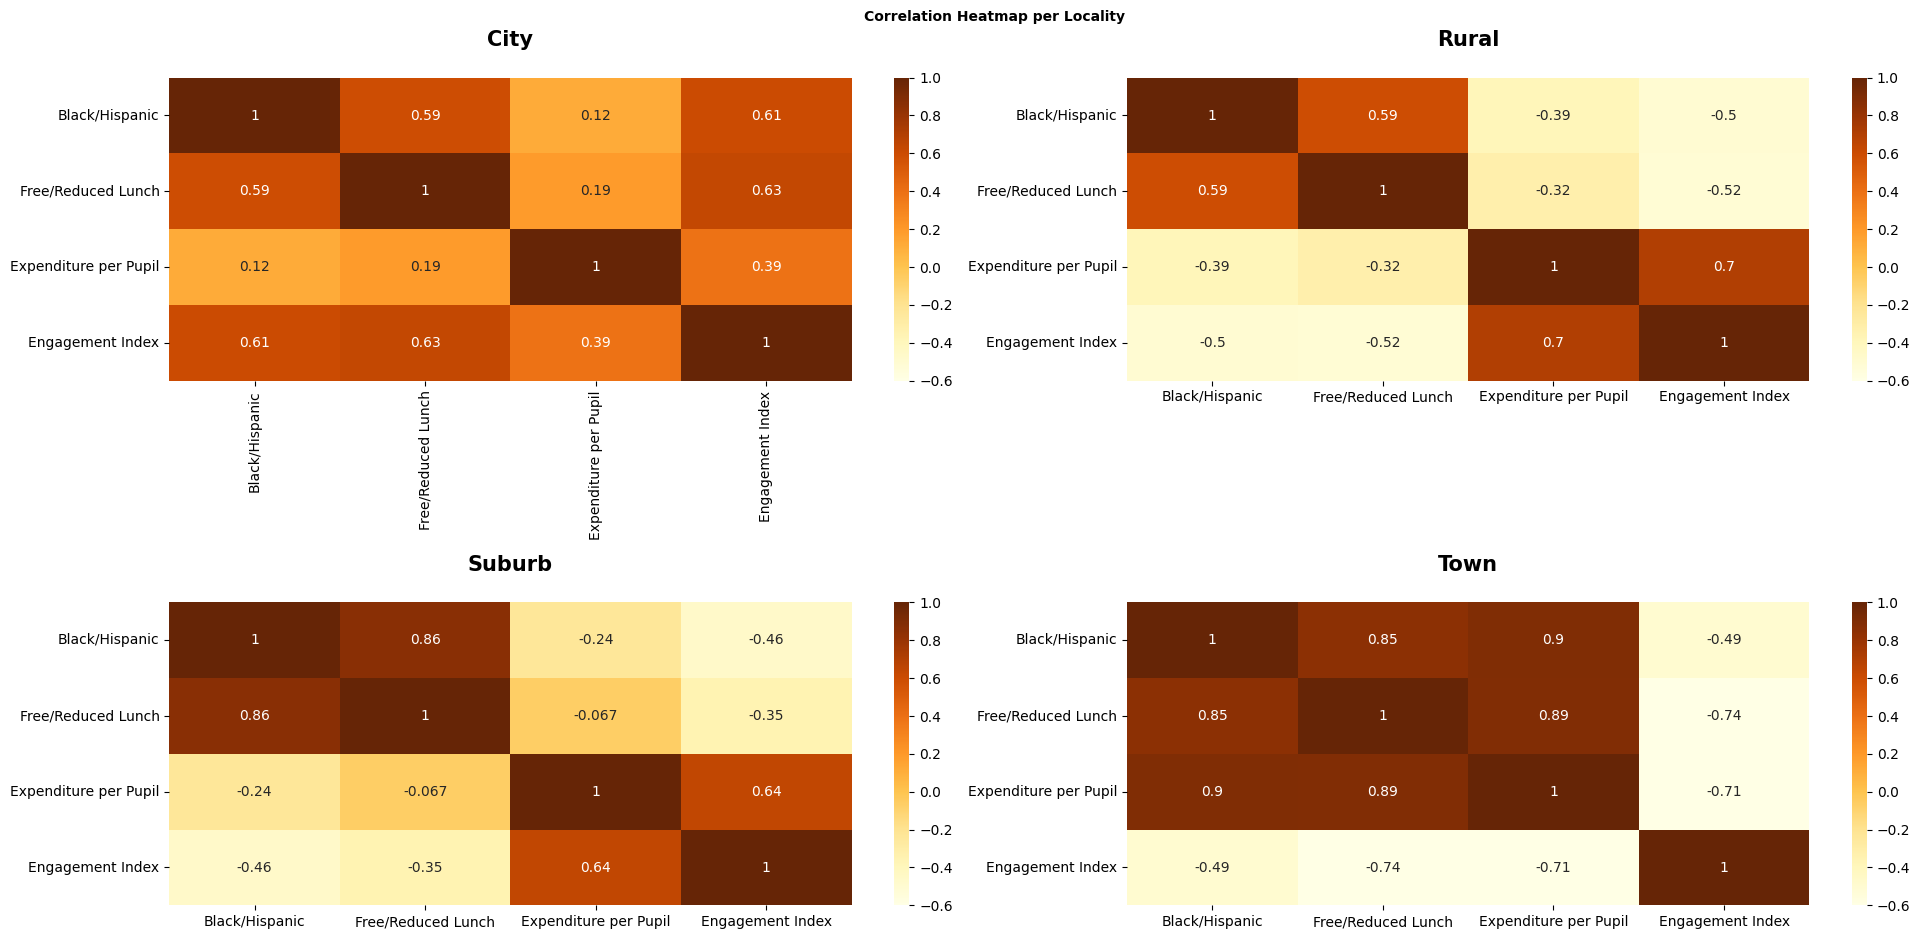

In [ ]:
#Create a list of locale (e.g City, Suburb...)
locale_type = dist_av_data['locale'].unique()
y_label = ['Black/Hispanic', 'Free/Reduced Lunch', 'Expenditure per Pupil','Engagement Index']
#Define the basic start of the axe
add_axe2 = 1
plt.figure(figsize=(20,20))
plt.suptitle('Correlation Heatmap per Locality\n', size=10, fontweight='bold')

#plot an heatmap for each locale in locale_type
for locale in locale_type:
    plt.subplot(4,2,add_axe2)
    heat = dist_av_data[dist_av_data['locale']==locale]
    sns.heatmap(heat[['pct_black_hispanic','pct_free_reduced','pp_total','engagement_index']].corr(), cmap='YlOrBr', annot=True, vmin=-0.6, vmax=1,
              yticklabels=y_label, xticklabels=y_label)
    plt.title(f'{locale}\n', fontweight='bold', size=15)
    plt.tight_layout()
    add_axe2 = add_axe2+1

plt.tight_layout()
plt.show()

- There is a negative correlation between the engagement index and the share in the population of Black/Hispanic pupils
- There is as well a negative correlation between the engagement index and the right to Free and reduced lunch
- high correlation between pupils being Black/Hispanic and having access to Free and reduced lunch
- the higher the expenditure per pupil is, the higher the engagement is




Locale:
- For district located in town and suburb we see an higher correlation than on the overall picture in term of Black/Hispanic population, access of free/reduced lunch and engagement index. The negative correlation being higher than the overall picture and the other localities.

- For the suburban area, for which most of districts are located, we observe an high correlation between ethnicity and Social support (free/reduced lunch). As well the negative correlation observed on the Engagement Index for Black/Hispanic population and social support is confirmed.

#Engagement through different products : LC & CM & SDO

In [ ]:
prod_engage_summary.head()

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

                                  URL    Product Name Provider/Company Name  \
0           http://www.calculator.com  Calculator.com        Calculator.com   
1  https://www.kidsa-z.com/main/Login        Kids A-Z            Lazel Inc.   
2                http://www.prezi.com           Prezi            Prezi Inc.   
3                 http://quizlet.com/         Quizlet               Quizlet   
4                http://www.issuu.com           Issuu                 Issuu   

                       Sector(s)         Primary Essential Function Function  \
0  PreK-12; Higher Ed; Corporate  LC - Sites, Resources & Reference      LC    
1                        PreK-12    LC - Digital Learning Platforms      LC    
2  PreK-12; Higher Ed; Corporate   LC - Content Creation & Curation      LC    
3                        PreK-12                   LC - Study Tools      LC    
4  PreK-12; Higher Ed; Corporate   LC - Content Creation & Curation      LC    

                 Function detail  
0   Sites, Resources & Reference  
1     Digital Learning Platforms  
2    Content Creation & Curation  
3                    Study Tools  
4    Content Creation & Curation

In [ ]:
#1. create product temp table - Engagement metric
product_temp = prod_engage_summary[['time','engagement_index','Function','Function detail']]
product_temp.head()

time  engagement_index Function                Function detail
0 2020-01-01              0.00      LC    Sites, Resources & Reference
1 2020-01-01              0.90      LC      Digital Learning Platforms
2 2020-01-01              1.20      LC     Content Creation & Curation
3 2020-01-01             37.79      LC                     Study Tools
4 2020-01-01              0.00      LC     Content Creation & Curation

In [ ]:
#2.drop NA values
product_temp=product_temp.dropna(subset = ['Function','Function detail'])

In [ ]:
temp_prod_engage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11187783 entries, 0 to 22324188
Data columns (total 4 columns):
 #   Column            Dtype         
---  ------            -----         
 0   time              datetime64[ns]
 1   engagement_index  float64       
 2   Function          object        
 3   Function detail   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 426.8+ MB


- Create temp table for each functions : LC, SDO & CM

In [ ]:
#1. LC temp
LC_temp = product_temp[(product_temp['Function'].str.contains('LC')) & ( product_temp['engagement_index']!= 0.00)]
LC_temp.head()

time  engagement_index Function  \
1 2020-01-01              0.90      LC    
2 2020-01-01              1.20      LC    
3 2020-01-01             37.79      LC    
5 2020-01-01              3.90      LC    
7 2020-01-01              5.10      LC    

                                     Function detail  
1                         Digital Learning Platforms  
2                        Content Creation & Curation  
3                                        Study Tools  
5   Sites, Resources & Reference - Streaming Serv...  
7                         Digital Learning Platforms

In [ ]:
LC_temp.groupby(['time','Function detail'])['engagement_index'].mean().reset_index().sort_values('engagement_index',ascending = False).head(10)

time                                    Function detail  \
4169 2020-09-02   Online Course Providers & Technical Skills De...   
4135 2020-08-31   Online Course Providers & Technical Skills De...   
4152 2020-09-01   Online Course Providers & Technical Skills De...   
4611 2020-09-28   Online Course Providers & Technical Skills De...   
4186 2020-09-03   Online Course Providers & Technical Skills De...   
4203 2020-09-04   Online Course Providers & Technical Skills De...   
4050 2020-08-26   Online Course Providers & Technical Skills De...   
4067 2020-08-27   Online Course Providers & Technical Skills De...   
4016 2020-08-24   Online Course Providers & Technical Skills De...   
4084 2020-08-28   Online Course Providers & Technical Skills De...   

      engagement_index  
4169       3550.052683  
4135       3540.142606  
4152       3515.829142  
4611       3194.089238  
4186       3141.114463  
4203       3140.902023  
4050       3023.921455  
4067       3008.538761  
4016       2902.361554  
4084       2898.876113

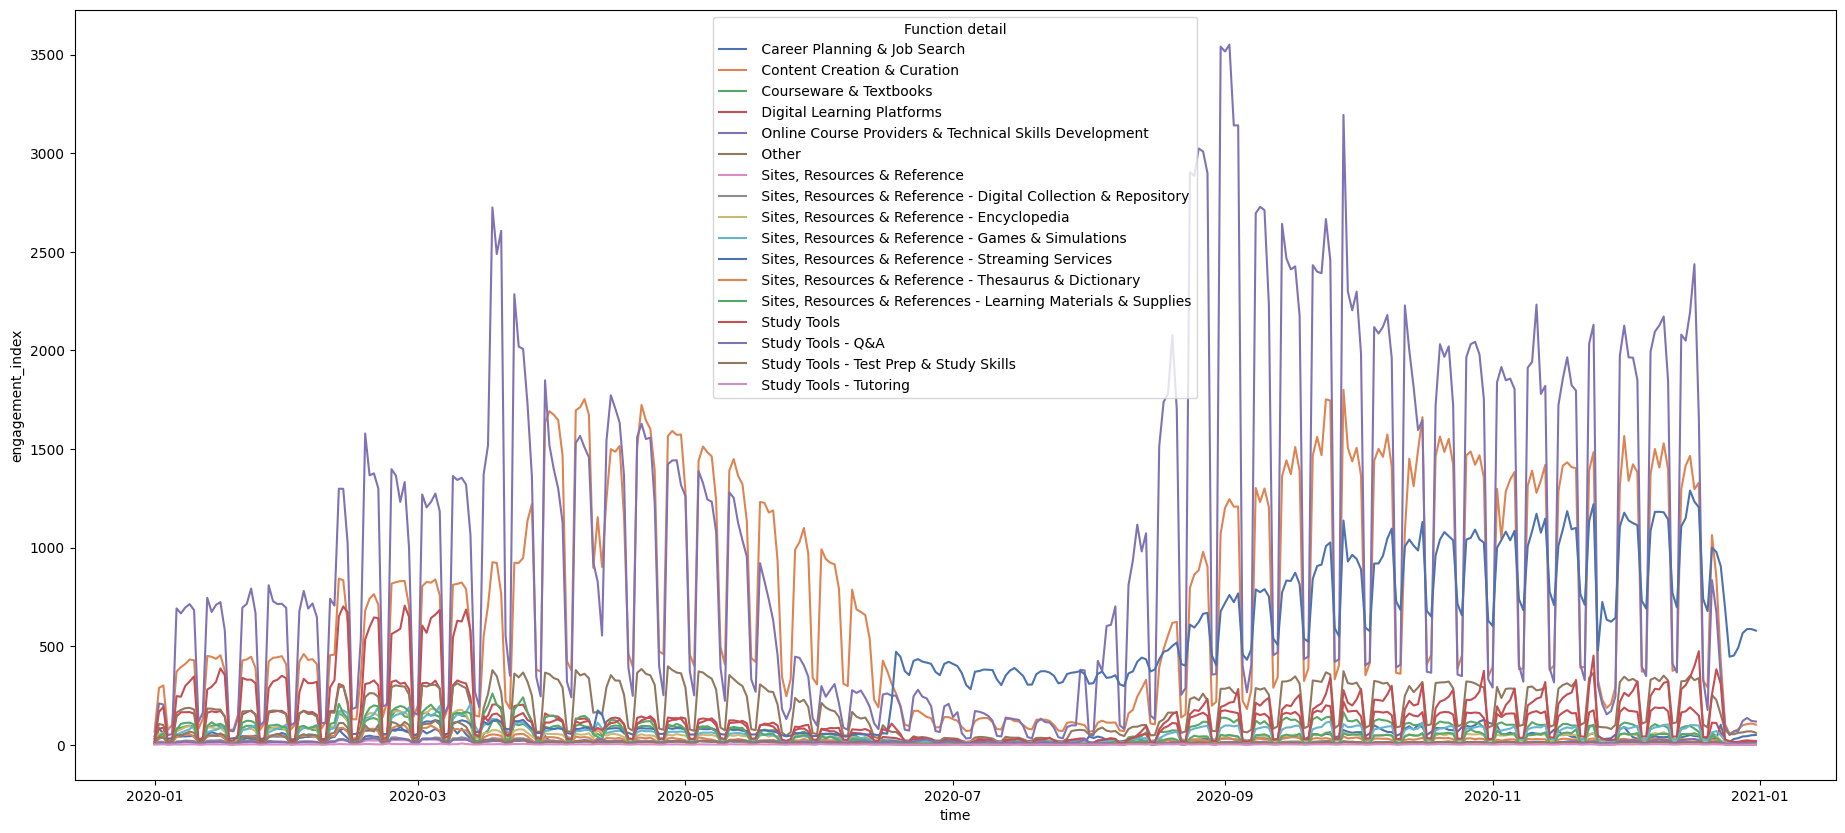

In [ ]:
#2. Plot table
plt.figure(figsize=(50,10))
plt.subplot(121)

sns.lineplot(
    data = LC_temp.groupby(['time','Function detail'])['engagement_index'].mean().reset_index(),
    x = 'time',
    y = 'engagement_index',
    hue ='Function detail',
    palette ='deep'
    )
plt.show()

- Digital Learning Platforms, Courseware & Textbooks, all of them reached their highest levels within the end of March
- Content Creation and Curation, Online Course provider displays much lower engagement in the begining but increases later half of 2020

In [ ]:
#1. CM temp table
CM_temp = product_temp[(product_temp['Function'].str.contains('CM')) & ( product_temp['engagement_index']!= 0.00)]
CM_temp.head()

time  engagement_index    Function  \
20  2020-01-01              2.40  LC/CM/SDO    
64  2020-01-01            361.43  LC/CM/SDO    
93  2020-01-01              0.60         CM    
103 2020-01-01              1.20  LC/CM/SDO    
164 2020-01-02              2.10         CM    

                                       Function detail  
20                                               Other  
64                                               Other  
93    Classroom Engagement & Instruction - Assessme...  
103                                              Other  
164   Classroom Engagement & Instruction - Communic...

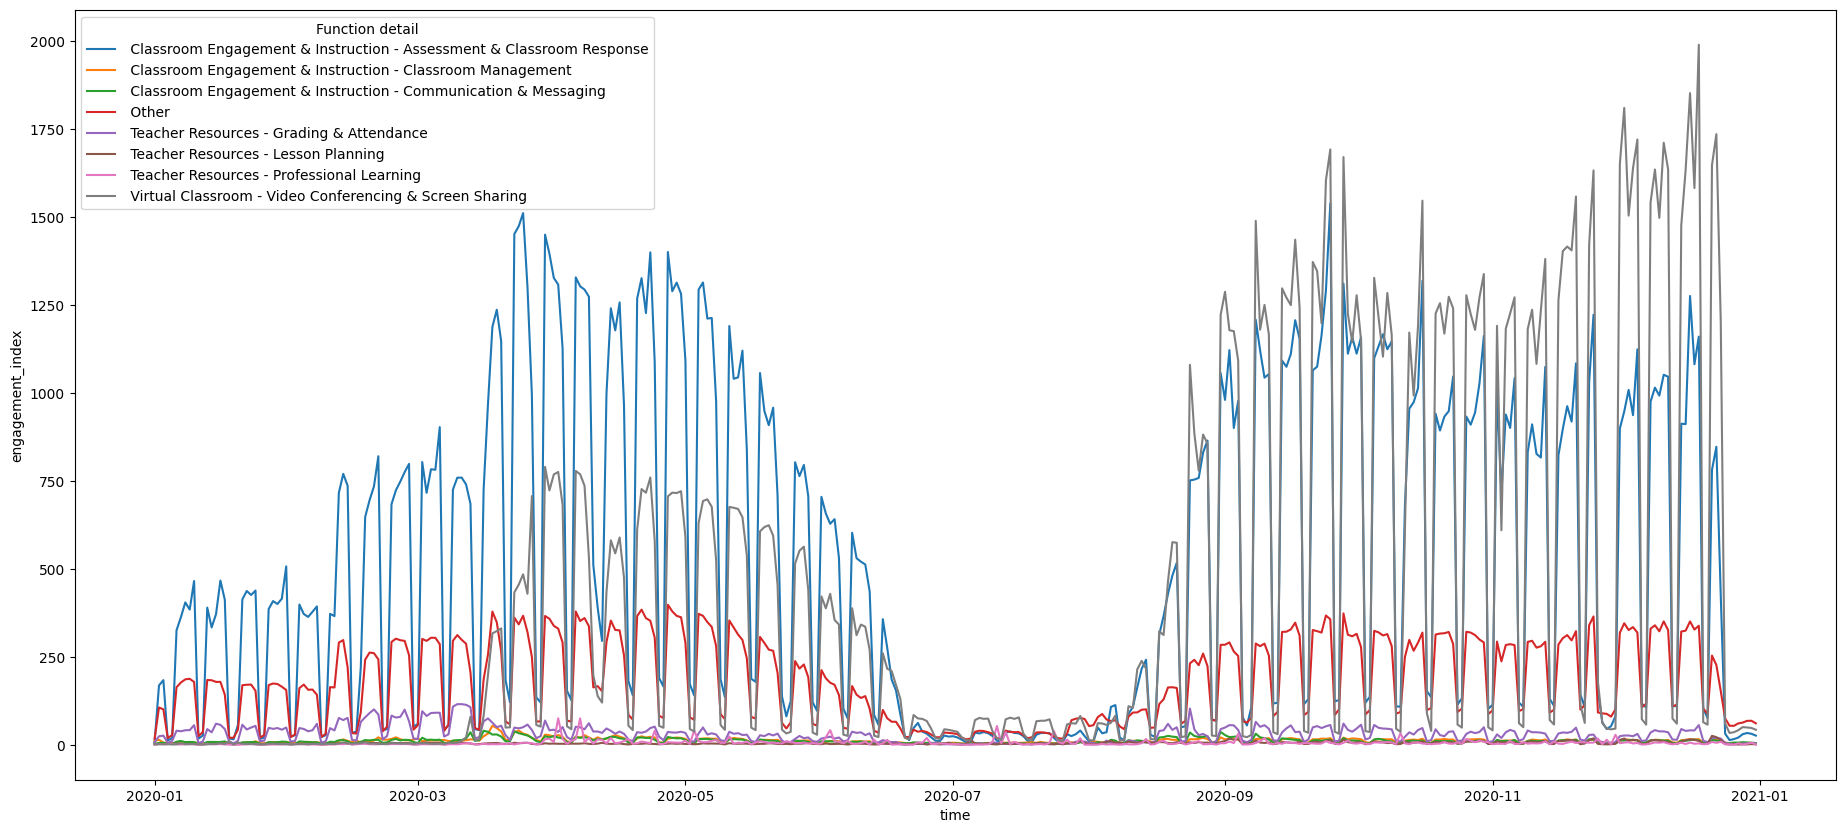

In [ ]:
#2. Plot CM function
plt.figure(figsize=(50,10))
plt.subplot(121)

sns.lineplot(
    data = CM_temp.groupby(['time','Function detail'])['engagement_index'].mean().reset_index(),
    x = 'time',
    y = 'engagement_index',
    hue ='Function detail',
    )
plt.show()

- Classroom engagement & instruction & virtual classrom - video conference

In [ ]:
#1. SDO temp table
SDO_temp = product_temp[(product_temp['Function'].str.contains('SDO')) & ( product_temp['engagement_index']!= 0.00)]
SDO_temp.head()

time  engagement_index    Function  \
20 2020-01-01              2.40  LC/CM/SDO    
37 2020-01-01             59.09        SDO    
39 2020-01-01            340.43        SDO    
50 2020-01-01              2.10        SDO    
55 2020-01-01              0.60        SDO    

                                      Function detail  
20                                              Other  
37   Data, Analytics & Reporting - Student Informa...  
39                  Learning Management Systems (LMS)  
50                  Learning Management Systems (LMS)  
55                                    Human Resources

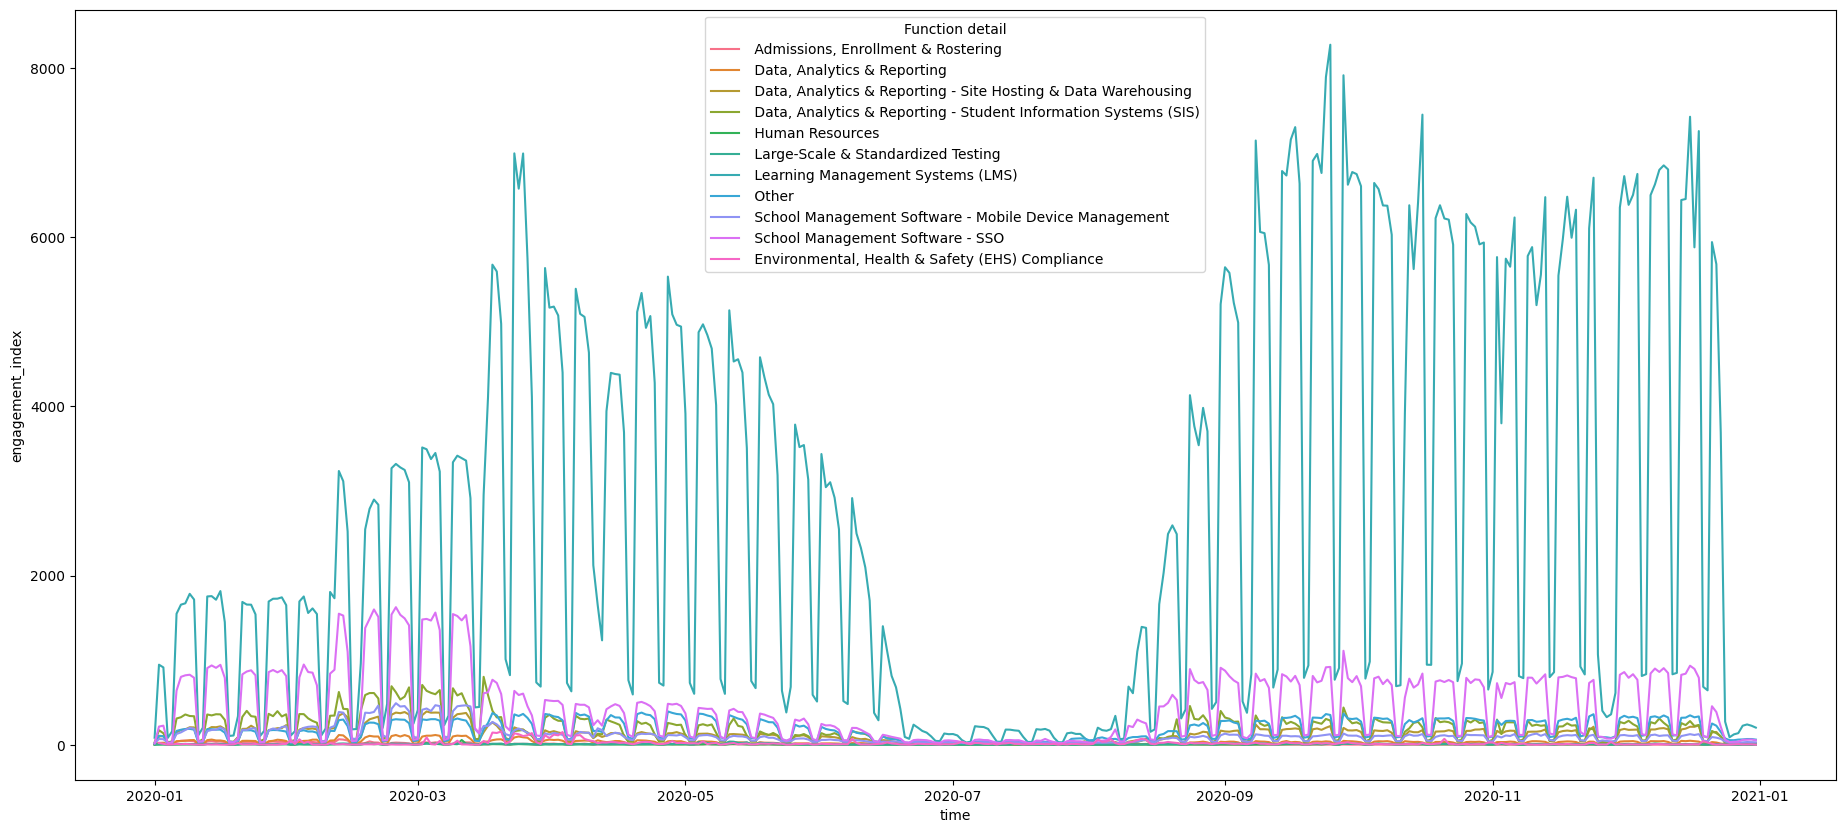

In [ ]:
#2. Plot SDO function
plt.figure(figsize=(50,10))
plt.subplot(121)

sns.lineplot(
    data = SDO_temp.groupby(['time','Function detail'])['engagement_index'].mean().reset_index(),
    x = 'time',
    y = 'engagement_index',
    hue ='Function detail',
    )
plt.show()

- Learning Management Systems, which is the most engaged one among the SDO-related functionalities and reaches its global maximum (slightly higher than the one reached in March) in September and still experiencing a slightly lower local peak before Summer.

# Outliers

In [ ]:
dist_engagement_summary.head()

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

         state  locale pct_black/hispanic pct_free/reduced  \
0  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
1  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
2  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
3  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   
4  Connecticut  Suburb         [0.6, 0.8[       [0.2, 0.4[   

  county_connections_ratio pp_total_raw pct_black_hispanic pct_free_reduced  \
0                [0.18, 1[          NaN                0.6              0.2   
1                [0.18, 1[          NaN                0.6              0.2   
2                [0.18, 1[          NaN                0.6              0.2   
3                [0.18, 1[          NaN                0.6              0.2   
4                [0.18, 1[          NaN                0.6              0.2   

  pp_total  
0     None  
1     None  
2     None  
3     None  
4     None

In [ ]:
dist_engagement_summary.groupby(['pct_black/hispanic','time'])['engagement_index'].mean().reset_index()

pct_black/hispanic       time  engagement_index
0              [0, 0.2[ 2020-01-01         15.699033
1              [0, 0.2[ 2020-01-02         75.288336
2              [0, 0.2[ 2020-01-03         76.659504
3              [0, 0.2[ 2020-01-04         16.704007
4              [0, 0.2[ 2020-01-05         22.561955
...                 ...        ...               ...
1825           [0.8, 1[ 2020-12-27         51.385745
1826           [0.8, 1[ 2020-12-28         59.221298
1827           [0.8, 1[ 2020-12-29         55.496357
1828           [0.8, 1[ 2020-12-30         58.015661
1829           [0.8, 1[ 2020-12-31         52.232163

[1830 rows x 3 columns]

In [ ]:
dist_engage_temp.head()

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

         state  locale  pct_black_hispanic  pct_free_reduced  pp_total  
0  Connecticut  Suburb                 0.6               0.2       NaN  
1  Connecticut  Suburb                 0.6               0.2       NaN  
2  Connecticut  Suburb                 0.6               0.2       NaN  
3  Connecticut  Suburb                 0.6               0.2       NaN  
4  Connecticut  Suburb                 0.6               0.2       NaN

In [ ]:
pd.crosstab(index=dist_engage_temp['state'], columns=dist_engage_temp['pct_black_hispanic']).cumsum(axis=1) #CROSS TAB

pct_black_hispanic        0.0      0.2      0.4      0.6      0.8
state                                                            
Arizona                     0        0        0        0    28135
California             483410   701548   885363  1219936  1308688
Connecticut           1618806  1983694  2240042  2549351  2549351
District Of Columbia        0        0    18706    18706   147500
Florida                     0        0   264735   264735   264735
Illinois              1267989  1608281  1734987  2207707  2352410
Indiana                379664   589684   589684   589684   651353
Massachusetts         1742166  1933763  1998538  1998538  1998538
Michigan                    0        0   191288   191288   191288
Minnesota                   0        0    29694    29694    29694
Missouri              1142982  1142982  1142982  1142982  1142982
New Hampshire           81736    81736    81736    81736    81736
New Jersey             203348   203348   203348   203348   203348
New York               262461   262461   262461   262461   286476
North Carolina              0   306898   524795   524795   524795
North Dakota             1607     1607     1607     1607     1607
Ohio                  1039140  1119639  1213641  1213641  1213641
Tennessee              166405   176378   176378   176378   176378
Texas                       0        0    27534   191515   191515
Utah                  1980166  2416911  2416911  2416911  2416911
Virginia               460740   460740   460740   672794   672794
Washington              82604   483444   798812   798812   798812
Wisconsin              203057   203057   203057   203057   203057

In [ ]:
dist_engage_temp.groupby('state')['dist_id'].count()

state
Arizona                   28135
California              1308688
Connecticut             2549351
District Of Columbia     147500
Florida                  264735
Illinois                2352410
Indiana                  651353
Massachusetts           1998538
Michigan                 191288
Minnesota                 29694
Missouri                1142982
New Hampshire             81736
New Jersey               203348
New York                 286476
North Carolina           524795
North Dakota               1607
Ohio                    1213641
Tennessee                176378
Texas                    191515
Utah                    2416911
Virginia                 672794
Washington               798812
Wisconsin                203057
Name: dist_id, dtype: int64

In [ ]:
dist_engage_temp[dist_engage_temp['pct_black_hispanic'] == 0.8]['dist_id'].nunique() #district that has more than 80% black/hispanic

8

In [ ]:
dist_engage_temp[dist_engage_temp['pct_black_hispanic'] == 0.8].groupby(['state','dist_id']).nunique()

time  lp_id  pct_access  engagement_index  \
state                dist_id                                              
Arizona              9007      366   1356        1416              5486   
California           4550      366   3181        1934             13145   
District Of Columbia 5479      366   2395        1625             13101   
                     7964      366   1816        2086              9974   
Illinois             9043      366   3687        2148             14522   
Indiana              2870      355   1898         826              5523   
                     4808      353   1227        1981              8014   
New York             9536      328   1112        2265              9632   

                              month  locale  pct_black_hispanic  \
state                dist_id                                      
Arizona              9007        12       1                   1   
California           4550        12       1                   1   
District Of Columbia 5479        12       1                   1   
                     7964        12       1                   1   
Illinois             9043        12       1                   1   
Indiana              2870        12       1                   1   
                     4808        12       1                   1   
New York             9536        12       1                   1   

                              pct_free_reduced  pp_total  
state                dist_id                              
Arizona              9007                    0         0  
California           4550                    1         0  
District Of Columbia 5479                    0         1  
                     7964                    0         1  
Illinois             9043                    1         1  
Indiana              2870                    1         1  
                     4808                    1         1  
New York             9536                    1         0

In [ ]:
dist_engage_temp.groupby(['state','dist_id']).nunique()

time  lp_id  pct_access  engagement_index  month  locale  \
state      dist_id                                                             
Arizona    9007      366   1356        1416              5486     12       1   
California 1570      358   3002        1259              9901     12       1   
           2074      366   3573         874              8909     12       1   
           2106      366   3678         735              8810     12       1   
           2172      273   3563        1682             11128     10       1   
...                  ...    ...         ...               ...    ...     ...   
Washington 5510      366   5281        1389             10518     12       1   
           7457      366   4013        1835             16324     12       1   
Wisconsin  5987      311   3198        2211             14434     11       1   
           7752      353   3133        1698              9709     12       1   
           8902      136   1236         530              1640     11       1   

                    pct_black_hispanic  pct_free_reduced  pp_total  
state      dist_id                                                  
Arizona    9007                      1                 0         0  
California 1570                      1                 1         0  
           2074                      1                 1         0  
           2106                      1                 1         0  
           2172                      1                 1         0  
...                                ...               ...       ...  
Washington 5510                      1                 1         1  
           7457                      1                 1         1  
Wisconsin  5987                      1                 1         1  
           7752                      1                 1         1  
           8902                      1                 1         1  

[176 rows x 9 columns]

In [ ]:
dist_engage_temp[dist_engage_temp['state'] == 'Arizona'] #1 district only

time  lp_id  pct_access  engagement_index  dist_id  month  \
20385652 2020-01-01  64895        0.12              1.24     9007      1   
20385653 2020-01-01  95731        1.11            128.55     9007      1   
20385654 2020-01-01  80560        0.12              7.42     9007      1   
20385655 2020-01-01  90153        0.00              0.00     9007      1   
20385656 2020-01-01  16753        0.49            221.26     9007      1   
...             ...    ...         ...               ...      ...    ...   
20413782 2020-12-31  61292        1.83            653.02     9007     12   
20413783 2020-12-31  98265        0.11             35.56     9007     12   
20413784 2020-12-31  62934        0.11             74.35     9007     12   
20413785 2020-12-31  76649        0.22              5.39     9007     12   
20413786 2020-12-31  32213        0.54             30.17     9007     12   

            state locale  pct_black_hispanic  pct_free_reduced  pp_total  
20385652  Arizona   City                 0.8               NaN       NaN  
20385653  Arizona   City                 0.8               NaN       NaN  
20385654  Arizona   City                 0.8               NaN       NaN  
20385655  Arizona   City                 0.8               NaN       NaN  
20385656  Arizona   City                 0.8               NaN       NaN  
...           ...    ...                 ...               ...       ...  
20413782  Arizona   City                 0.8               NaN       NaN  
20413783  Arizona   City                 0.8               NaN       NaN  
20413784  Arizona   City                 0.8               NaN       NaN  
20413785  Arizona   City                 0.8               NaN       NaN  
20413786  Arizona   City                 0.8               NaN       NaN  

[28135 rows x 11 columns]

In [ ]:
dist_engage_temp[dist_engage_temp['state'] == 'District Of Columbia']

time  lp_id  pct_access  engagement_index  dist_id  month  \
11993903 2020-01-01  41587        0.02              0.25     5479      1   
11993904 2020-01-01  72468        0.02              0.49     5479      1   
11993905 2020-01-01  49751        0.02              0.25     5479      1   
11993906 2020-01-01  99916        0.17              2.22     5479      1   
11993907 2020-01-01  61517        0.02              0.49     5479      1   
...             ...    ...         ...               ...      ...    ...   
18040119 2020-12-31  48165        0.04              2.74     7964     12   
18040120 2020-12-31  43491        0.04             50.92     7964     12   
18040121 2020-12-31  55450        0.06              8.21     7964     12   
18040122 2020-12-31  26696        0.02              3.37     7964     12   
18040123 2020-12-31  76649        6.46            323.59     7964     12   

                         state locale  pct_black_hispanic  pct_free_reduced  \
11993903  District Of Columbia   City                 0.8               NaN   
11993904  District Of Columbia   City                 0.8               NaN   
11993905  District Of Columbia   City                 0.8               NaN   
11993906  District Of Columbia   City                 0.8               NaN   
11993907  District Of Columbia   City                 0.8               NaN   
...                        ...    ...                 ...               ...   
18040119  District Of Columbia   City                 0.8               NaN   
18040120  District Of Columbia   City                 0.8               NaN   
18040121  District Of Columbia   City                 0.8               NaN   
18040122  District Of Columbia   City                 0.8               NaN   
18040123  District Of Columbia   City                 0.8               NaN   

          pp_total  
11993903   18000.0  
11993904   18000.0  
11993905   18000.0  
11993906   18000.0  
11993907   18000.0  
...            ...  
18040119   18000.0  
18040120   18000.0  
18040121   18000.0  
18040122   18000.0  
18040123   18000.0  

[147500 rows x 11 columns]

In [ ]:
arizona_engagement = dist_engage_temp[dist_engage_temp['state'] == 'Arizona'].groupby('time')['engagement_index'].mean().reset_index()

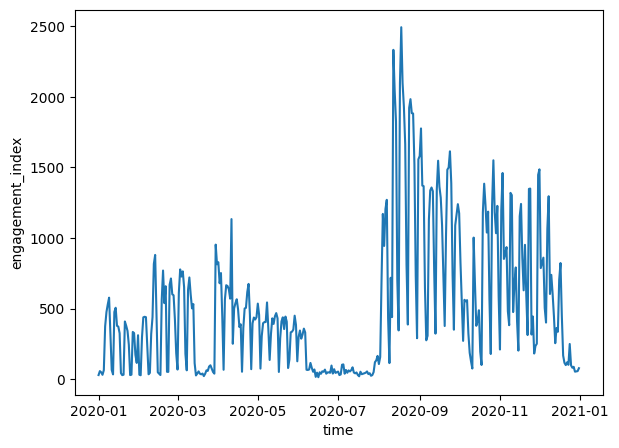

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.lineplot(
    data = arizona_engagement,
    x = 'time',
    y ='engagement_index'
)
plt.show()

<Axes: xlabel='time', ylabel='engagement_index'>

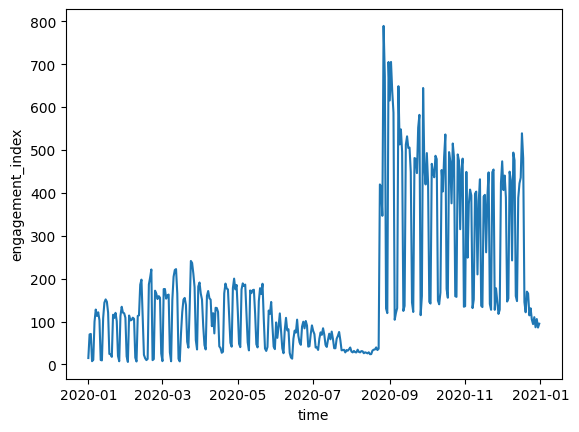

In [ ]:
sns.lineplot(
    data = dist_engage_temp[dist_engage_temp['state'] == 'District Of Columbia'].groupby('time')['engagement_index'].mean().reset_index(),
    x = 'time',
    y ='engagement_index'
)

#Digital engagement gap between low / high black/hispanic student - less engagement for black/hispanic students

In [ ]:
#plotting data with 0.2 - 0.4
dist_engage_temp[dist_engage_temp['pct_black_hispanic'] < 0.4].groupby('time')['engagement_index'].mean().reset_index()

time  engagement_index
0   2020-01-01         15.027531
1   2020-01-02         70.868137
2   2020-01-03         71.657954
3   2020-01-04         15.572650
4   2020-01-05         20.963346
..         ...               ...
361 2020-12-27         30.353686
362 2020-12-28         31.409159
363 2020-12-29         32.008580
364 2020-12-30         32.755861
365 2020-12-31         32.223470

[366 rows x 2 columns]

In [ ]:
dist_engage_temp.head()

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

         state  locale  pct_black_hispanic  pct_free_reduced  pp_total  
0  Connecticut  Suburb                 0.6               0.2       NaN  
1  Connecticut  Suburb                 0.6               0.2       NaN  
2  Connecticut  Suburb                 0.6               0.2       NaN  
3  Connecticut  Suburb                 0.6               0.2       NaN  
4  Connecticut  Suburb                 0.6               0.2       NaN

In [ ]:
#1. add in situation column to classify if this is true or false high % black/hispanic area
engagement_by_hispanic_black = dist_engage_temp[(dist_engage_temp["state"].notnull()) & (dist_engage_temp["pct_black_hispanic"].notnull())]
engagement_by_hispanic_black["high_pct_black_hispanic"] = engagement_by_hispanic_black["pct_black_hispanic"] >= 0.4
engagement_by_hispanic_black.head()

<ipython-input-77-b42ca9b91abd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engagement_by_hispanic_black["high_pct_black_hispanic"] = engagement_by_hispanic_black["pct_black_hispanic"] >= 0.4


time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

         state  locale  pct_black_hispanic  pct_free_reduced  pp_total  \
0  Connecticut  Suburb                 0.6               0.2       NaN   
1  Connecticut  Suburb                 0.6               0.2       NaN   
2  Connecticut  Suburb                 0.6               0.2       NaN   
3  Connecticut  Suburb                 0.6               0.2       NaN   
4  Connecticut  Suburb                 0.6               0.2       NaN   

   high_pct_black_hispanic  
0                     True  
1                     True  
2                     True  
3                     True  
4                     True

In [ ]:
#2. plot table
engagement_by_hispanic_black_plot = engagement_by_hispanic_black.groupby(["high_pct_black_hispanic","time"])["engagement_index"].mean().reset_index()
engagement_by_hispanic_black_plot.head()

high_pct_black_hispanic       time  engagement_index
0                    False 2020-01-01         15.027531
1                    False 2020-01-02         70.868137
2                    False 2020-01-03         71.657954
3                    False 2020-01-04         15.572650
4                    False 2020-01-05         20.963346

In [ ]:
access_by_hispanic_black_plot = engagement_by_hispanic_black.groupby(["high_pct_black_hispanic","time"])["pct_access"].mean().reset_index()
access_by_hispanic_black_plot.head()

high_pct_black_hispanic       time  pct_access
0                    False 2020-01-01    0.127560
1                    False 2020-01-02    0.544828
2                    False 2020-01-03    0.554803
3                    False 2020-01-04    0.128700
4                    False 2020-01-05    0.171799

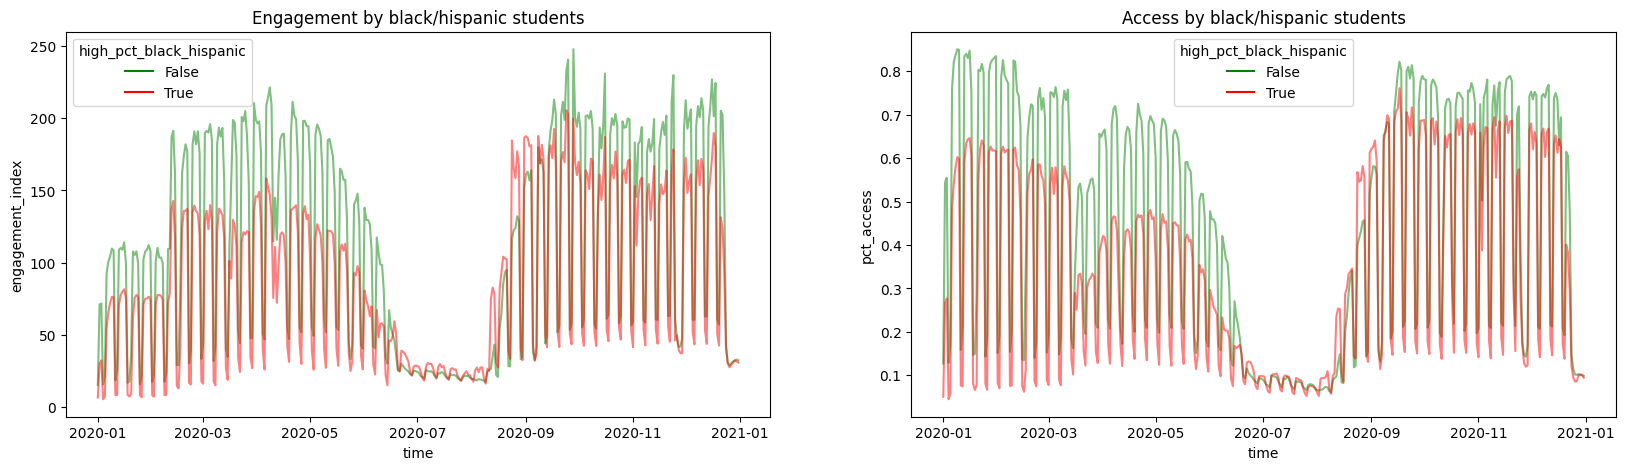

In [ ]:
#3. Plot
plt.figure(figsize=(20,5))

plt.subplot(121)
sns.lineplot(
    data = engagement_by_hispanic_black_plot,
    x ='time',
    y = 'engagement_index',
    hue ='high_pct_black_hispanic',
    palette=['green', 'red'],
    alpha = 0.5
)
plt.title('Engagement by black/hispanic students')


plt.subplot(122)
sns.lineplot(
    data = access_by_hispanic_black_plot,
    x ='time',
    y = 'pct_access',
    hue ='high_pct_black_hispanic',
    palette=['green', 'red'],
    alpha = 0.5
)

plt.title('Access by black/hispanic students')
plt.show()

In [ ]:
engagement_by_hispanic_black_plot.groupby('high_pct_black_hispanic')['engagement_index'].mean()

high_pct_black_hispanic
False    109.771440
True      85.942324
Name: engagement_index, dtype: float64

- Findings regarding engagement between high vs low black/hispanic district/states : state or district which have higher percentage of black/hispanic seems to have lower engagement index comparing to other ( caucasian dominant ) states

## Correlation between free/reduced lunch and pct Black/Hispanic students ( positive corr)

Free or Reduced-Price Lunch (FRPL) %	Category

0-25%	Low-poverty school

25-50%	Mid-low poverty school

50-75%	Mid-high poverty school

75-100%	High-poverty school



In [ ]:
plot_free_his_black = dist_engage_temp[(dist_engage_temp['pct_black_hispanic'] != 0.0) & (dist_engage_temp['pct_free_reduced'] != 0.0)].dropna()

In [ ]:
plot_free_his_black.head()

time  lp_id  pct_access  engagement_index  dist_id  month  \
644160 2020-01-01  57513        0.49            141.28     1052      1   
644161 2020-01-01  42091        0.04              0.41     1052      1   
644162 2020-01-01  53399        0.04              8.19     1052      1   
644163 2020-01-01  32213        0.90             44.23     1052      1   
644164 2020-01-01  85836        0.04              0.41     1052      1   

           state  locale  pct_black_hispanic  pct_free_reduced  pp_total  
644160  Illinois  Suburb                 0.2               0.2   16000.0  
644161  Illinois  Suburb                 0.2               0.2   16000.0  
644162  Illinois  Suburb                 0.2               0.2   16000.0  
644163  Illinois  Suburb                 0.2               0.2   16000.0  
644164  Illinois  Suburb                 0.2               0.2   16000.0

In [ ]:
corr_black_free_lunch = plot_free_his_black["pct_black_hispanic"].corr(plot_free_his_black["pct_free_reduced"])
corr_black_free_lunch

0.661376028643267

In [ ]:
plot_sample =plot_free_his_black.sample(500)

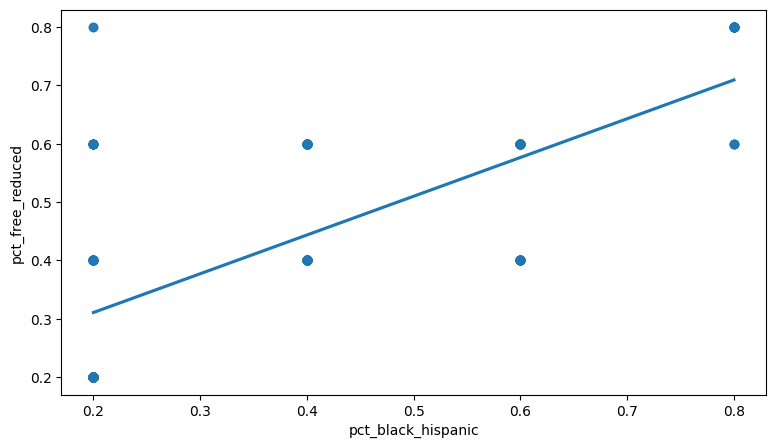

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.regplot(x= 'pct_black_hispanic',
            y= 'pct_free_reduced',
            ci=None,
            data=plot_sample)
plt.show()

There is a positive correlation between black/hispanic students and free/reduce lunch program , which can imply that in general with the districts have more percentage of black/hispanic students tend to be in higher poverty level

In [ ]:
dist_temp.head()

index       time  lp_id  dist_id  locale  engagement_index  pct_access  \
13     15 2020-01-01  10178     4683  Suburb              0.13        0.01   
43     51 2020-01-01  10533     3222    City              0.68        0.01   
59     72 2020-01-01  10533     5510    City              0.51        0.01   
77     96 2020-01-01  10533     8784  Suburb              2.00        0.05   
87    108 2020-01-01  10625     1705    City              0.15        0.02   

    pct_black_hispanic  pct_free_reduced  pp_total black/hispanic_situation  \
13                 0.4               0.4    8000.0             Above median   
43                 0.2               0.6    8000.0             Below median   
59                 0.2               0.4   14000.0             Below median   
77                 0.6               0.6   10000.0             Above median   
87                 0.2               0.4   12000.0             Below median   

   free/reduce_situation  
13          Above median  
43          Above median  
59          Above median  
77          Above median  
87          Above median

In [ ]:
dist_temp.groupby(['time','black/hispanic_situation'])['pct_access'].mean().reset_index()

time black/hispanic_situation  pct_access
0   2020-01-01             Above median    0.053576
1   2020-01-01             Below median    0.096096
2   2020-01-02             Above median    0.057995
3   2020-01-02             Below median    0.117353
4   2020-01-03             Above median    0.062506
..         ...                      ...         ...
727 2020-12-29             Below median    0.146198
728 2020-12-30             Above median    0.131718
729 2020-12-30             Below median    0.151698
730 2020-12-31             Above median    0.125425
731 2020-12-31             Below median    0.142943

[732 rows x 3 columns]

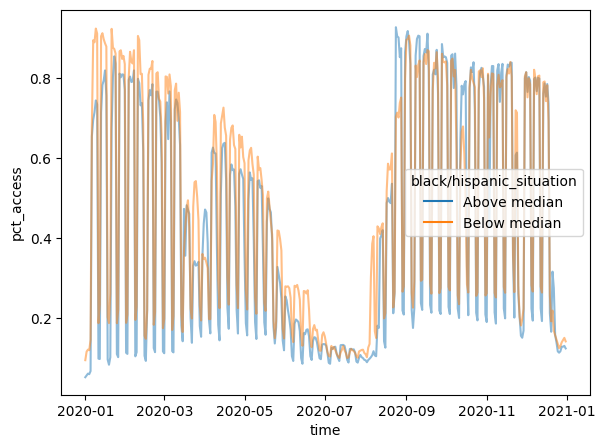

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.lineplot(
    data = dist_temp.groupby(['time','black/hispanic_situation'])['pct_access'].mean().reset_index(),
    x ='time',
    y = 'pct_access',
    hue ='black/hispanic_situation',
    alpha = 0.5)

plt.show()

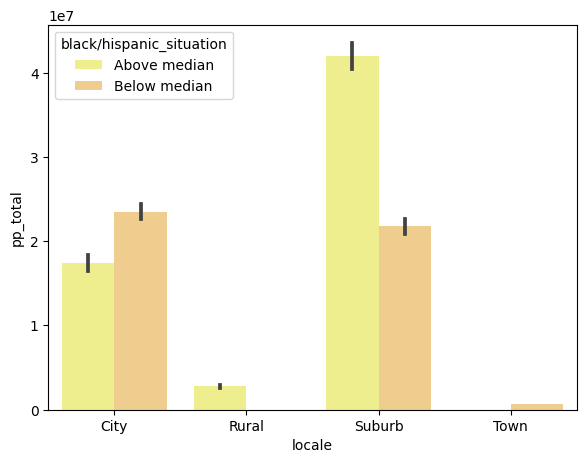

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(
    data = dist_temp.groupby(['time','black/hispanic_situation','locale'])['pp_total'].sum().reset_index(),
    x ='locale',
    y = 'pp_total',
    hue ='black/hispanic_situation',
    palette=['yellow', 'orange'],
    alpha = 0.5)

plt.show()

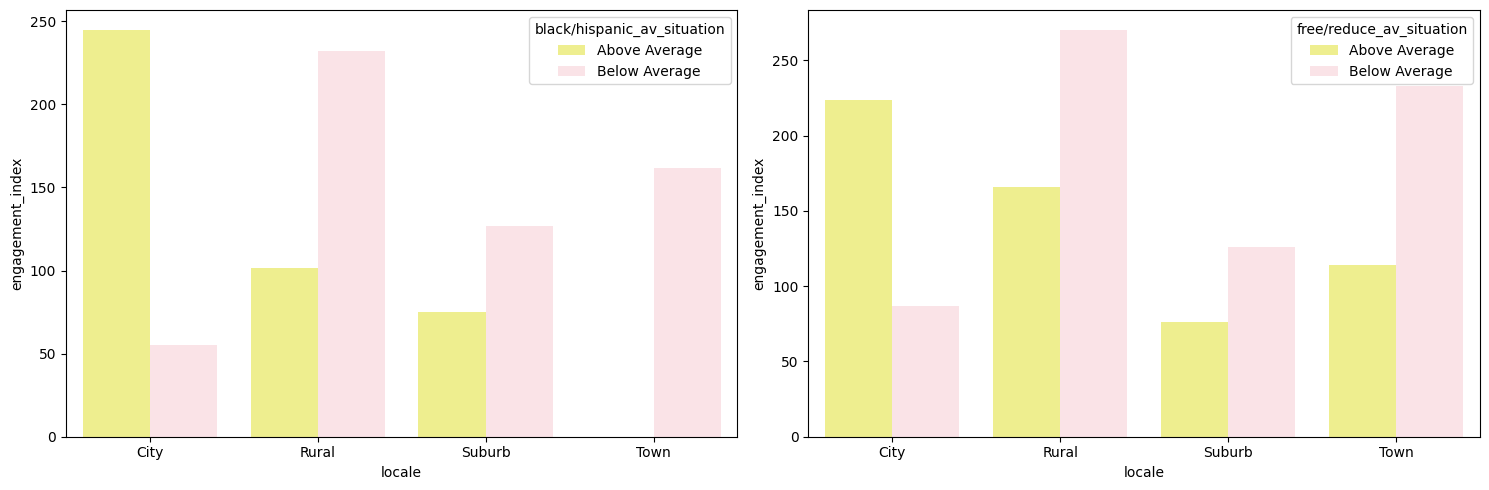

In [ ]:
#2. Plot
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.barplot(
    data = dist_av_data.groupby(['black/hispanic_av_situation','locale'])['engagement_index'].mean().reset_index(),
    x ='locale',
    y = 'engagement_index',
    hue ='black/hispanic_av_situation',
    palette=['yellow', 'pink'],
    alpha = 0.5
)

plt.subplot(122)
sns.barplot(
    data = dist_av_data.groupby(['free/reduce_av_situation','locale'])['engagement_index'].mean().reset_index(),
    x ='locale',
    y = 'engagement_index',
    hue ='free/reduce_av_situation',
    palette=['yellow', 'pink'],
    alpha = 0.5
)
plt.tight_layout()
plt.show()


#below average means less black/hispanic

# Product Recommendation

In [ ]:
prod_engage_summary.head()

time  lp_id  pct_access  engagement_index  dist_id  month  \
0 2020-01-01  93690        0.00              0.00     1000      1   
1 2020-01-01  17941        0.03              0.90     1000      1   
2 2020-01-01  65358        0.03              1.20     1000      1   
3 2020-01-01  98265        0.57             37.79     1000      1   
4 2020-01-01  59257        0.00              0.00     1000      1   

                                  URL    Product Name Provider/Company Name  \
0           http://www.calculator.com  Calculator.com        Calculator.com   
1  https://www.kidsa-z.com/main/Login        Kids A-Z            Lazel Inc.   
2                http://www.prezi.com           Prezi            Prezi Inc.   
3                 http://quizlet.com/         Quizlet               Quizlet   
4                http://www.issuu.com           Issuu                 Issuu   

                       Sector(s)         Primary Essential Function Function  \
0  PreK-12; Higher Ed; Corporate  LC - Sites, Resources & Reference      LC    
1                        PreK-12    LC - Digital Learning Platforms      LC    
2  PreK-12; Higher Ed; Corporate   LC - Content Creation & Curation      LC    
3                        PreK-12                   LC - Study Tools      LC    
4  PreK-12; Higher Ed; Corporate   LC - Content Creation & Curation      LC    

                 Function detail  
0   Sites, Resources & Reference  
1     Digital Learning Platforms  
2    Content Creation & Curation  
3                    Study Tools  
4    Content Creation & Curation

In [ ]:
#1. create a sample (1000) table with top engage product
top_engage_product = prod_engage_summary.groupby(['Function detail','Product Name'])['engagement_index'].mean().reset_index().sort_values(by = 'engagement_index',ascending = False).head(1000).reset_index().drop(columns = 'index')
top_engage_product.head()

Function detail      Product Name  \
0                        Content Creation & Curation       Google Docs   
1                  Learning Management Systems (LMS)  Google Classroom   
2   Sites, Resources & Reference - Streaming Serv...           YouTube   
3   Online Course Providers & Technical Skills De...            Canvas   
4   Virtual Classroom - Video Conferencing & Scre...              Meet   

   engagement_index  
0       9833.445131  
1       5166.622061  
2       3221.426710  
3       2313.604214  
4       1737.514975

In [ ]:
#2.import library
import nltk
import string
import warnings
from scipy.stats import pearsonr
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#3. data-text cleaning - remove stopwords
def remove_stopwords(text):
  stop_words = stopwords.words('english')

  imp_words = []

  # Storing the important words
  for word in str(text).split():
    word = word.lower()

    if word not in stop_words:
      imp_words.append(word)

  output = " ".join(imp_words)

  return output

In [ ]:
#4.remove stopwords
top_engage_product['Function detail'] = top_engage_product['Function detail'].apply(lambda text: remove_stopwords(text))
top_engage_product['Product Name'] = top_engage_product['Product Name'].apply(lambda text: remove_stopwords(text))
top_engage_product.head()

Function detail      Product Name  \
0                        content creation & curation       google docs   
1                  learning management systems (lms)  google classroom   
2  sites, resources & reference - streaming services           youtube   
3  online course providers & technical skills dev...            canvas   
4  virtual classroom - video conferencing & scree...              meet   

   engagement_index  
0       9833.445131  
1       5166.622061  
2       3221.426710  
3       2313.604214  
4       1737.514975

In [ ]:
#5. remove punctuations
punctuations_list = string.punctuation


def cleaning_punctuations(text):
    signal = str.maketrans('', '', punctuations_list)
    return text.translate(signal)


top_engage_product['Function detail'] = top_engage_product['Function detail'].apply(lambda x: cleaning_punctuations(x))
top_engage_product['Product Name'] = top_engage_product['Product Name'].apply(lambda x: cleaning_punctuations(x))
top_engage_product.head()

Function detail      Product Name  \
0                         content creation  curation       google docs   
1                    learning management systems lms  google classroom   
2     sites resources  reference  streaming services           youtube   
3  online course providers  technical skills deve...            canvas   
4  virtual classroom  video conferencing  screen ...              meet   

   engagement_index  
0       9833.445131  
1       5166.622061  
2       3221.426710  
3       2313.604214  
4       1737.514975

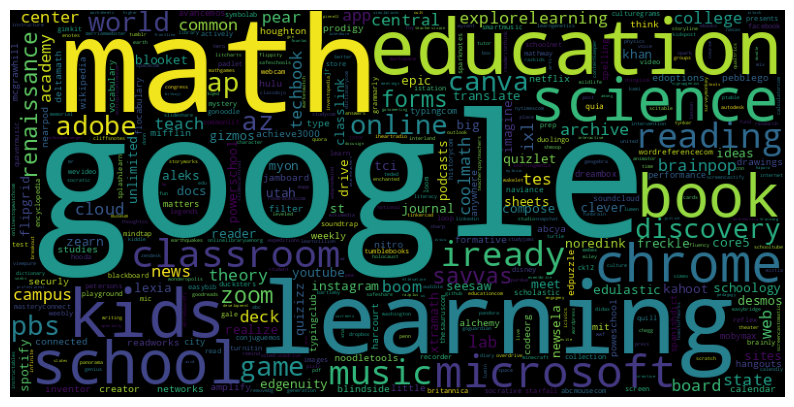

In [ ]:
#wordcloud
details_corpus = " ".join(top_engage_product['Product Name'])

plt.figure(figsize=(10, 10))
wc = WordCloud(max_words=1000,
               width=800,
               height=400).generate(details_corpus)
plt.axis('off')
plt.imshow(wc)
plt.show()

In [ ]:
#6. implement recommendation
%%capture
vectorizer = TfidfVectorizer(analyzer = 'word')
vectorizer.fit(top_engage_product['Product Name'])

In [ ]:
def get_similarities(product_function, data=top_engage_product):

    talk_array1 = vectorizer.transform(product_function).toarray()


    sim = []
    pea = []
    for idx, row in data.iterrows():
        details = row['Product Name']


        talk_array2 = vectorizer.transform(
            top_engage_product[top_engage_product['Product Name'] == details]['Product Name']).toarray()

        cos_sim = cosine_similarity(talk_array1, talk_array2)[0][0]


        pea_sim = pearsonr(talk_array1.squeeze(), talk_array2.squeeze())[0]

        sim.append(cos_sim)
        pea.append(pea_sim)

    return sim, pea

In [ ]:
#recommendation
def recommend_talks(product_function, data=top_engage_product):

    data['cos_sim'], data['pea_sim'] = get_similarities(product_function)

    data.sort_values(by=['cos_sim', 'pea_sim'], ascending=[
                     False, False], inplace=True)

    display(data[['Product Name', 'Function detail']].head(10))

In [ ]:
product_function = ['canvas']
recommend_talks(product_function)

Product Name                                    Function detail
3           canvas  online course providers  technical skills deve...
145  canvas chrome                         content creation  curation
16            zoom  virtual classroom  video conferencing  screen ...
2          youtube     sites resources  reference  streaming services
29           zearn                         digital learning platforms
307        zendesk                                    human resources
36        xtramath                         digital learning platforms
296         wyzant                              study tools  tutoring
71      typingclub                         digital learning platforms
77       wikipedia           sites resources  reference  encyclopedia

# REF
https://www.brookings.edu/blog/how-we-rise/2020/09/23/students-of-color-most-likely-to-be-learning-online-districts-must-work-even-harder-on-race-equity/

https://www2.ed.gov/about/offices/list/ocr/docs/20210608-impacts-of-covid19.pdf

https://www.highspeedinternet.com/resources/state-cost-of-internet

https://www.mckinsey.com/industries/public-and-social-sector/our-insights/covid-19-and-learning-loss-disparities-grow-and-students-need-help

https://www.diverseeducation.com/demographics/african-american/article/15106057/study-black-and-latino-students-often-left-out-of-advanced-coursework
